# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** YYYY/YYYY

### Team Members (Alphabetical Order):
1. Surname1, Name1 (StudentID1);
2. Surname2, Name2 (StudentID2).

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
StudentID1 = os.getenv("matricola")
# StudentID2 = ...  # <-------- Fill in the missing value

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Movies
Music
*************************************
*** THESE ARE THE SELECTED FEATURES:
God
Loneliness
Energy levels
Achievements
Children
Questionnaires or polls
Workaholism
Personality
Giving
Prioritising workload
New environment
Judgment calls
Health
Empathy
Self-criticism
Friends versus money
Thinking ahead
Eating to survive
Cheating in school
Dreams
Public speaking
Compassion to animals
Number of friends
Daily events
Life struggles
Small - big dogs
Punctuality
Knowing the right people
Finding lost valuables
Final judgement
Decision making
Interests or hobbies
Parents' advice
Fake
Borrowed stuff
Mood swings
Unpopularity
Reliability
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
Music
Slow songs or fast songs
Dance
Folk
Country


## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [3]:
# DO NOT IMPORT NUMPY
import pandas as pd

import matplotlib as cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples

# %matplotlib widget
pd.set_option('future.no_silent_downcasting', True)
pd.options.display.float_format = "{:.4f}".format


## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [4]:
# load the dataset responses_hw.csv
PATH_RESPONSES_HW = r"data\responses_hw.csv"

# working dataframe of the whole dataset
data = pd.read_csv(PATH_RESPONSES_HW)
print(f"Original dataset shape: {data.shape}")

# extract columns corresponding to the variables in "these_features" and "labels"
print(f"Number of columns in these_features: {len(these_features)}")
print(f"Number of columns in labels: {len(labels)}")
X_df = data.copy()[these_features + labels]
print(f"Dataset shape after extracting desired columns: {data.shape}")

# random selection of 2/3 of the rows
n_rows = X_df.shape[0]
rng = np.random.default_rng(seed=random_seed)
random_indeces = rng.choice(a=n_rows, size=int(n_rows * 2/3), replace=False)

X_df = X_df.iloc[random_indeces]

print(f"Dataset shape after randomly selecting 2/3 of the rows: {X_df.shape}")

Original dataset shape: (1010, 150)
Number of columns in these_features: 82
Number of columns in labels: 10
Dataset shape after extracting desired columns: (1010, 150)
Dataset shape after randomly selecting 2/3 of the rows: (673, 92)


In [5]:
# load "columns_hw" dataset
COLUMNS_PATH = r"data\columns_hw.csv"
columns_df = pd.read_csv(COLUMNS_PATH)

# extract feature's names of interest
columns_df = columns_df.loc[columns_df["short"].isin(these_features)]
short_columns, original_columns = columns_df["short"].values, columns_df["original"].values

# create dictionary for future conversion (short question --> original question)
columns_mapping = {short: original for short,original in zip(short_columns, original_columns)}

In [6]:
# investigate features data types
X_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 673 entries, 341 to 171
Columns: 92 entries, God to Home Type
dtypes: float64(79), int64(4), object(9)
memory usage: 489.0+ KB


In [7]:
# extract non-numerical columns belonging to "these_features" and investigate its values
# I will deal with features in "labels" later
CATEGORICAL_VARS = [col for col in X_df[these_features].columns if X_df[col].dtype == "object"]

for var in CATEGORICAL_VARS:
    print(f"Column '{var}' has values: {X_df[var].unique()}")

Column 'Punctuality' has values: ['early' 'on time' 'late']
Column 'Smoking' has values: ['former smoker' 'current smoker' 'tried smoking' 'never smoked' nan]
Column 'Alcohol' has values: ['social drinker' 'never' 'drink a lot' nan]


**Ordinal Encoding of Categorical Variables**7

Answers extracted from the homework pdf "HW_PCA.pdf". I will reference this order for the ordinal encoding formatting.

**Personality Traits**
- Timekeeping: I am often early. - I am always on time. - I am often running late. (categorical)

**Health Habits**
- Smoking habits: Never smoked - Tried smoking - Former smoker - Current smoker (categorical)
- Drinking: Never - Social drinker - Drink a lot (categorical)

In [8]:
# define mappings for categorical variables
punctuality_mapping = {"early": 1, "on time": 2, "late": 3}
smoking_mapping = {"never smoked": 1, "tried smoking": 2, "former smoker": 3, "current smoker": 4}
alcohol_mapping = {"never": 1, "social drinker": 2, "drink a lot": 3}

# apply mapping
MAPPINGS = [punctuality_mapping, smoking_mapping, alcohol_mapping]
for var, map in zip(CATEGORICAL_VARS, MAPPINGS):
    X_df[var] = X_df[var].replace(map)

In [9]:
# mask indicating position of missing values
MISSING_MASK = X_df.isna()

# percentage of missing values
print(f"Percentage of missing values: {(100 * (MISSING_MASK.sum().sum() / MISSING_MASK.size)).round(2)} %\n")
print(f"Percentage of rows with missing values: {(100 * ((MISSING_MASK.sum(axis=1) != 0).sum() / X_df.shape[0])).round(2)} %\n")

# compute and display percentage of missing values per column/row
COLS_MISSING_PERC = (100 * (MISSING_MASK.sum(axis=0) / MISSING_MASK.shape[0])).round(2).sort_values(ascending=False)
ROWS_MISSING_PERC = (100 * (MISSING_MASK.sum(axis=1) / MISSING_MASK.shape[1])).round(2).sort_values(ascending=False)
print(f"Top 10 Columns with highest percentage of missing values:\n{COLS_MISSING_PERC[:10]}\n")
print(f"Top 10 Rows with highest percentage of missing values:\n{ROWS_MISSING_PERC[:10]}\n")

Percentage of missing values: 0.38 %

Percentage of rows with missing values: 21.84 %

Top 10 Columns with highest percentage of missing values:
Weight                 2.0800
Height                 1.7800
Punk                   0.8900
Smoking                0.8900
Latino                 0.8900
Age                    0.7400
Gender                 0.7400
Documentary            0.7400
Friends versus money   0.7400
Number of siblings     0.7400
dtype: float64

Top 10 Rows with highest percentage of missing values:
777   5.4300
422   5.4300
902   5.4300
790   5.4300
142   4.3500
63    4.3500
201   4.3500
226   4.3500
960   4.3500
708   3.2600
dtype: float64



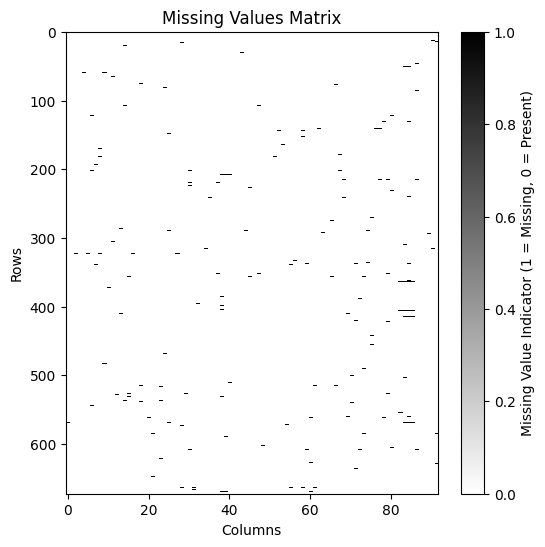

In [10]:
# plot the missing values matrix
plt.figure(figsize=(6, 6))
plt.imshow(MISSING_MASK, aspect='auto', cmap='binary', interpolation='none')
plt.colorbar(label='Missing Value Indicator (1 = Missing, 0 = Present)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Matrix')
plt.show()

In [11]:
# drop rows with missing values
X_df = X_df.dropna()
y_df = X_df[labels]
X_df = X_df[these_features]
print(f"Dataframe shape after removal of rows with missing values: {X_df.shape}")
print(f"Labels dataframe shape after removal of rows with missing values: {y_df.shape}")

Dataframe shape after removal of rows with missing values: (526, 82)
Labels dataframe shape after removal of rows with missing values: (526, 10)


### Issue About Missing Values

From the analysis above, the dataset contains approximately **0.3% to 0.4% missing values overall**, with **20% of rows** containing at least one missing value. While the percentage of missing values is relatively low, the high proportion of rows affected by missing data presents a challenge for downstream tasks like **PCA** and **KMeans clustering**.

#### Analysis of Missing Data

1. **Impact of Row Removal**:
   - Removing rows with missing values ensures data integrity by avoiding potentially misleading or biased imputed values. However, this approach would result in a **20% reduction in the dataset size**, which could pose challenges:
     - Clustering tasks like KMeans rely on sufficient data points to identify meaningful patterns and well-defined clusters. Excessive reduction in the dataset could negatively impact clustering results.
     - For PCA, reducing the dataset size might limit the variance captured by the principal components, potentially weakening the dimensionality reduction process.

2. **Concerns About Imputation**:
   - In class was highlighted that imputing missing values can introduce **incorrect or misleading data** if the imputed values do not accurately reflect the underlying data distribution. This can distort both PCA and clustering results.
   - Despite this, there may be value in testing imputation methods, particularly those that preserve the structure of the dataset (e.g., `KNNImputer`), to assess whether the benefits of retaining more data outweigh the risks.

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [12]:
# function to apply MinMax and Standard scaling to a DataFrame
def scaler(X):

    ss_scaler = StandardScaler()
    mm_scaler = MinMaxScaler()

    X_std, X_mm = pd.DataFrame(ss_scaler.fit_transform(X), columns=X.columns), pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)
    return X_std, X_mm

# scale the dataset after removing rows with missing values
X_std_df, X_mm_df = scaler(X_df)

In [13]:
# generates a DataFrame summarizing mean and variance statistics for the original, MinMax-scaled, and Standard-scaled versions of the input data
def get_stats_df(X:pd.DataFrame) -> pd.DataFrame:

    X_std, X_mm = scaler(X)

    stats_X = np.vstack([X.mean().values, X.var().values])
    stats_X_mm = np.vstack([X_mm.mean().values, X_mm.var().values])
    stats_X_std = np.vstack([X_std.mean().values, X_std.var().values])

    data = np.hstack([stats_X.T.flatten(), stats_X_mm.T.flatten(), stats_X_std.T.flatten()]).reshape(3, -1)

    multi_columns = pd.MultiIndex.from_product([X_df.columns, ["Mean", "Variance"]], names=["Feature", "Statistic"])

    return pd.DataFrame(data=data,
                        index=["Baseline", "MinMax", "StandardScaler"],
                        columns=multi_columns)

In [14]:
# generate statistics DataFrame for the dataset, including mean and variance for original, MinMax-scaled, and Standard-scaled data
stats_df = get_stats_df(X_df)
display(stats_df)

# calculate the mean of the statistics (mean and variance) across all features
mean_across_features = stats_df.T.groupby(level="Statistic").mean().T
display(mean_across_features)

Feature           God          Loneliness          Energy levels           \
Statistic        Mean Variance       Mean Variance          Mean Variance   
Baseline       3.2814   2.2331     2.9087   1.3478        3.6236   1.0618   
MinMax         0.5703   0.1396     0.4772   0.0842        0.6559   0.0664   
StandardScaler 0.0000   1.0019    -0.0000   1.0019        0.0000   1.0019   

Feature        Achievements          Children           ... Rock n roll  \
Statistic              Mean Variance     Mean Variance  ...        Mean   
Baseline             2.9639   0.8654   3.5665   1.2708  ...      3.1521   
MinMax               0.4910   0.0541   0.6416   0.0794  ...      0.5380   
StandardScaler      -0.0000   1.0019  -0.0000   1.0019  ...      0.0000   

Feature                 Alternative          Latino          Techno, Trance  \
Statistic      Variance        Mean Variance   Mean Variance           Mean   
Baseline         1.5387      2.8593   1.7935 2.8270   1.7776         2.3783   
MinMax           0.0962      0.4648   0.1121 0.4567   0.1111         0.3446   
StandardScaler   1.0019      0.0000   1.0019 0.0000   1.0019         0.0000   

Feature                  Opera           
Statistic      Variance   Mean Variance  
Baseline         1.7709 2.1521   1.3863  
MinMax           0.1107 0.2880   0.0866  
StandardScaler   1.0019 0.0000   1.0019  

[3 rows x 164 columns]

Statistic        Mean Variance
Baseline       3.0804   1.3712
MinMax         0.5278   0.0885
StandardScaler 0.0000   1.0019

In [15]:
# extract the mean statistics for all features from the stats DataFrame
mean_df = stats_df.xs("Mean", level="Statistic", axis=1)

# extract the variance statistics for all features from the stats DataFrame
variance_df = stats_df.xs("Variance", level="Statistic", axis=1)

for method in ["Baseline", "MinMax", "StandardScaler"]:
    # find the feature with the largest mean and its value for the current scaling method
    largest_mean_feature = mean_df.loc[method].idxmax()
    largest_mean_value = mean_df.loc[method].max()
    
    # find the feature with the smallest mean and its value for the current scaling method
    smallest_mean_feature = mean_df.loc[method].idxmin()
    smallest_mean_value = mean_df.loc[method].min()
    
    # print results for mean statistics
    print(f"=== {method} - Mean ===")
    print(f"Largest mean feature: {largest_mean_feature} with value {largest_mean_value:.3f}")
    print(f"Smallest mean feature: {smallest_mean_feature} with value {smallest_mean_value:.3f}")
    print()
    
    # find the feature with the largest variance and its value for the current scaling method
    largest_var_feature = variance_df.loc[method].idxmax()
    largest_var_value = variance_df.loc[method].max()
    
    # find the feature with the smallest variance and its value for the current scaling method
    smallest_var_feature = variance_df.loc[method].idxmin()
    smallest_var_value = variance_df.loc[method].min()
    
    # print results for variance statistic
    print(f"=== {method} - Variance ===")
    print(f"Largest variance feature: {largest_var_feature} with value {largest_var_value:.3f}")
    print(f"Smallest variance feature: {smallest_var_feature} with value {smallest_var_value:.3f}")
    print("----------------------------------------------------\n")

=== Baseline - Mean ===
Largest mean feature: Music with value 4.757
Smallest mean feature: Storm with value 1.941

=== Baseline - Variance ===
Largest variance feature: Spiders with value 2.426
Smallest variance feature: Alcohol with value 0.322
----------------------------------------------------

=== MinMax - Mean ===
Largest mean feature: Music with value 0.939
Smallest mean feature: Storm with value 0.235

=== MinMax - Variance ===
Largest variance feature: Punctuality with value 0.154
Smallest variance feature: Music with value 0.023
----------------------------------------------------

=== StandardScaler - Mean ===
Largest mean feature: Movies with value 0.000
Smallest mean feature: Alcohol with value -0.000

=== StandardScaler - Variance ===
Largest variance feature: Loneliness with value 1.002
Smallest variance feature: Comedy with value 1.002
----------------------------------------------------



### **Interpreting Mean and Variance for Baseline, MinMax, and StandardScaler**

#### 1. Baseline (Unscaled) Data

1. **Mean**  
   - For a feature $X$ rated on a 1–5 scale, the sample mean $\bar{X}$ is given by $\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i$.  
   - Since the rating scale’s midpoint is **3**, if the baseline mean $\bar{X}$ is near 3, it suggests that responses are, on average, neutral.  
   - If $\bar{X} > 3$, respondents tended to give ratings above the neutral point, and if $\bar{X} < 3$, they favored lower-than-neutral ratings.

2. **Variance**  
   - The sample variance $s_X^2$ is defined as $s_X^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{X})^2$ (consistent with pandas' `.var()` method).  
   - A larger variance means that responses are more spread out around the mean.  
   - For example, a high variance (e.g., $s_X^2 > 2$ for "God") suggests diverse opinions among respondents, while a low variance (e.g., $s_X^2 < 1$ for "Energy levels") indicates greater consensus.

#### 2. MinMax Scaling

1. **Algebra of MinMax Scaling**  
   - Each value $x_i$ is scaled to $x_i^{(\text{scaled})}$ by $x_i^{(\text{scaled})} = \frac{x_i - x_{\min}}{x_{\max} - x_{\min}}$ where $x_{\min}$ and $x_{\max}$ are the feature's minimum and maximum values.  
   - All scaled values lie within $[0, 1]$, and the scaled mean typically moves toward **0.5** if the original mean was near the midpoint (3 on a 1–5 scale).

2. **Variance Under MinMax Scaling**  
   - Since the scaled range is fixed to $[0, 1]$, the variance is compressed $s_{X^{(\text{scaled})}}^2 = \frac{s_X^2}{(x_{\max} - x_{\min})^2}$ For a 1–5 rating scale, $(x_{\max} - x_{\min}) = 4$, leading to a significant reduction in variance.

#### 3. Standard Scaling

1. **Algebra of Standard Scaling**  
   - Each feature $X$ is transformed to $x_i^{(\text{scaled})}$ by $x_i^{(\text{scaled})} = \frac{x_i - \bar{X}}{\sigma_X}$ where $\bar{X}$ is the mean and $\sigma_X$ is the standard deviation $\sqrt{s_X^2}$.  

   - Properties of StandardScaler:
     - $\frac{1}{n} \sum_{i=1}^n x_i^{(\text{scaled})} = 0$
       
     - $s_{X^{(\text{scaled})}}^2 = 1$
       

2. **Interpretation**  
   - StandardScaler removes the original scale and centers all features around 0, with a uniform variance of 1.  
   - While we lose the reference to “neutral” ratings (e.g., 3 on a 1–5 scale), this transformation ensures all features contribute equally to distance-based algorithms like PCA and KMeans.

In [16]:
# Initialize PCA for the baseline data (unscaled)
baseline_pca = PCA(random_state=random_seed)
baseline_pca.fit(X_df)

# Initialize PCA for the MinMax scaled data
mm_pca = PCA(random_state=random_seed)
mm_pca.fit(X_mm_df)

# Initialize PCA for the Standard scaled data
ss_pca = PCA(random_state=random_seed)
ss_pca.fit(X_std_df)

# Dictionary to store the PCA results for each scaling method
PCA_DICTIONARY = {
    "Baseline": baseline_pca,
    "MinMax Scaling": mm_pca,
    "Standard Scaling": ss_pca
}

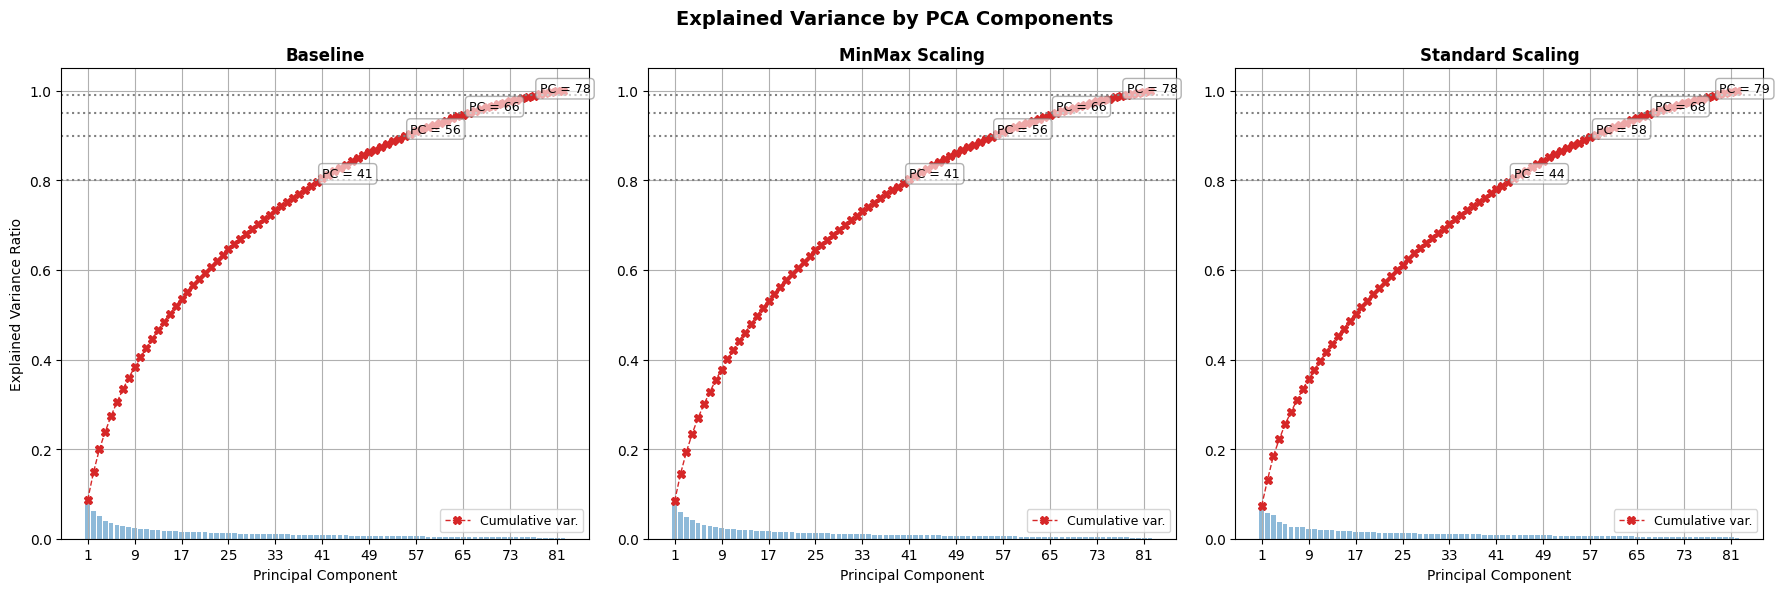

In [17]:
# plot cumulative explained variance for pca components with different scaling methods
THRESHOLDS=[0.8, 0.9, 0.95, 0.99]

# create subplots for each scaling method
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (transformation, pca_instance) in zip(axes, PCA_DICTIONARY.items()):

    # extract explained variance ratio and cumulative variance ratio
    exp_var_ratio = pca_instance.explained_variance_ratio_
    cum_var_ratio = np.cumsum(exp_var_ratio)
    n_components = len(exp_var_ratio)
    x_vals = range(1, n_components + 1)

    # plot individual explained variance as bars
    ax.bar(x_vals, exp_var_ratio, alpha=0.5, align='center', color='tab:blue')
    
    # plot cumulative explained variance as a line
    ax.plot(x_vals, cum_var_ratio, marker='X', linestyle='--', linewidth=1, color='tab:red', label='Cumulative var.')

    # plot thresholds as horizontal lines and annotate the number of components needed
    for t in THRESHOLDS:
        ax.axhline(y=t, color='gray', linestyle=':')
        idx = np.argmax(cum_var_ratio >= t)  # find index where cumulative variance exceeds threshold
        if cum_var_ratio[idx] >= t:
            ax.text(idx+1, t, f"PC = {idx+1}", color='black', fontsize=9, ha='left', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='gray', alpha=0.6))

    ax.set_title(transformation, fontsize=12, fontweight='bold')
    ax.set_xlabel('Principal Component', fontsize=10)
    ax.set_xticks(range(1, n_components + 1, max(1, n_components//10)))
    ax.set_ylim(0, 1.05)
    ax.legend(loc='best', fontsize=9)
    ax.grid()
    
    # set ylabel for the baseline plot only
    if transformation == "Baseline":
        ax.set_ylabel('Explained Variance Ratio', fontsize=10)

fig.suptitle('Explained Variance by PCA Components', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

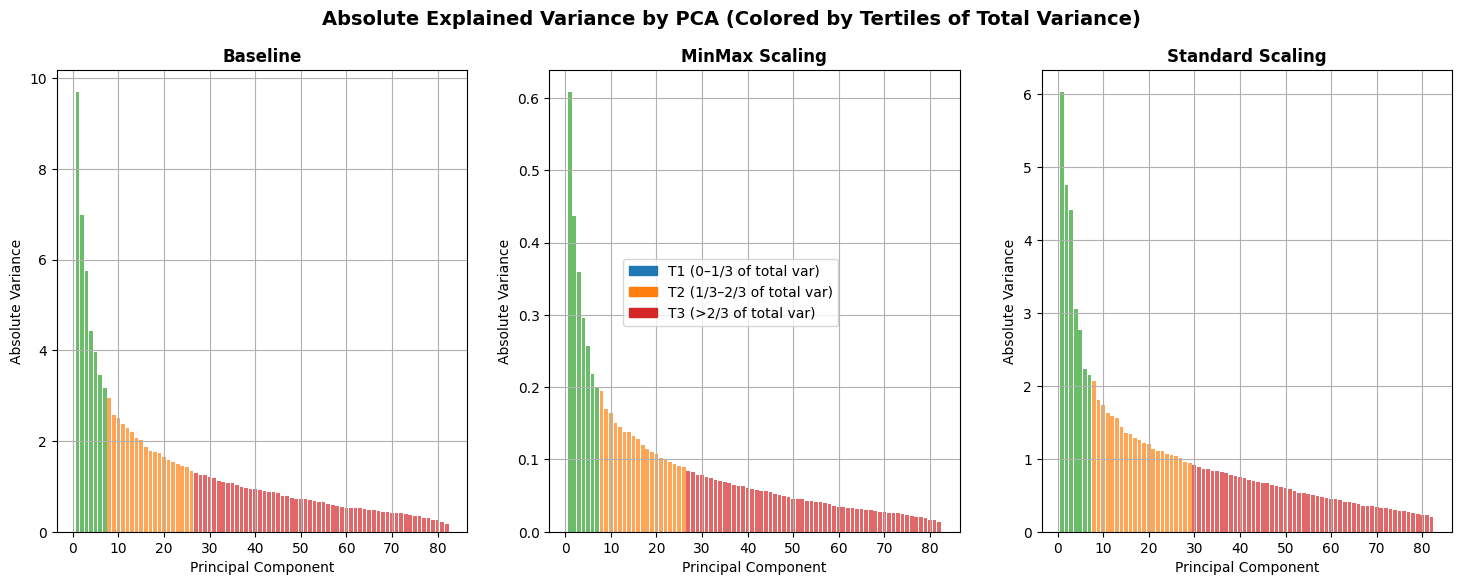

In [18]:
# plot absolute explained variance by pca components, highlighting tertiles of total variance
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# legend patches for tertiles
tertile_patches = [
    mpatches.Patch(color='tab:blue', label='T1 (0–1/3 of total var)'),  # first tertile
    mpatches.Patch(color='tab:orange', label='T2 (1/3–2/3 of total var)'),  # second tertile
    mpatches.Patch(color='tab:red', label='T3 (>2/3 of total var)')  # third tertile
]

for ax, (transformation, pca_instance) in zip(axes, PCA_DICTIONARY.items()):    

    # calculate explained variance and cumulative variance
    explained_var = pca_instance.explained_variance_
    cum_var = np.cumsum(explained_var)
    total_var = cum_var[-1]  # total variance from all components
    x_vals = np.arange(1, len(explained_var) + 1)

    # calculate thresholds for tertiles of total variance
    t1_thresh = total_var / 3.0
    t2_thresh = 2.0 * total_var / 3.0

    # assign colors based on which tertile the cumulative variance falls into
    colors = []
    for cv in cum_var:
        if cv <= t1_thresh:
            colors.append('tab:green')
        elif cv <= t2_thresh:
            colors.append('tab:orange')
        else:
            colors.append('tab:red')

    # plot explained variance as bars, colored by tertiles
    ax.bar(x_vals, explained_var, color=colors, alpha=0.7)
    ax.set_title(transformation, fontsize=12, fontweight='bold')
    ax.set_xlabel('Principal Component', fontsize=10)
    ax.set_ylabel('Absolute Variance', fontsize=10)
    ax.grid()


fig.suptitle("Absolute Explained Variance by PCA (Colored by Tertiles of Total Variance)", fontsize=14, fontweight='bold')
fig.legend(handles=tertile_patches, loc='center')
plt.show()

### **Comments and Interpretation of PCA Plots**

#### Cumulative Explained Variance

- **Overall Shape**  
  All three scaling methods produce a similar “S‐shaped” curve in terms of how many principal components (PCs) are required to capture specific fractions of the total variance (e.g., 80%, 90%, etc.). Despite slight numerical differences in the variance each PC holds, the position of these variance milestones (e.g., around 40 PCs for 80% and 55 for 90%) remains consistent across all three approaches.  
  - **High Dimensionality**: Because the questionnaire includes numerous items (often well over 50), it is not unusual to require 40+ PCs to attain 80% of the variance. In other words, a higher‐dimensional dataset typically spreads its variability across more components.

- **Implication**
  This consistency suggests that scaling does not significantly alter the *relative* structure of the data or the number of PCs needed for a given level of explained variance.


#### Absolute Explained Variance and Tertiles

Below each cumulative curve, bar plots depict the **absolute variance** of each PC. Bars are colored according to which *tertile* of total variance (i.e., 0–1/3, 1/3–2/3, 2/3–1) the *cumulative* explained variance has reached (we will make use of this observation in the next exercise):

1. **Baseline**  
   - The first few PCs can have notably large variances if certain questions exhibit a wider spread of responses in their raw 1–5 form.  
   - Consequently, T1 (the first 1/3 of total variance) is reached with fewer PCs, illustrating a more “front‐loaded” variance distribution.

2. **MinMax**  
   - Rescaling all variables to $[0,1]$ prevents any single question from dominating due to a larger numeric range, thus lowering the first PC variance (often < 1).  
   - **Particularly for rating data (1–5), MinMax scaling is advantageous** because it preserves the ordinal structure without creating negative values, and it is straightforward to interpret a scaled score of, say, 0.8 as “80% of the maximum rating.”  
   - As a result, it may take more PCs to move through each tertile (blue → orange → red), reflecting a more uniform distribution of variance.

3. **Standard**  
   - Each feature is standardized (mean 0, std 1), making the total initial variance roughly equal to the number of features.  
   - No single item inflates the first few PCs excessively, leading to a smoother progression through T1, T2, and T3 compared to Baseline.

#### Key Observations

1. **Consistency in Number of PCs**  
   - Whether Baseline, MinMax, or Standard, approximately the same number of components is required to reach 80–90–95% of the total variance.

2. **Dominance vs. Balance**  
   - In Baseline, certain questions with slightly higher raw variance can dominate the leading PCs.  
   - MinMax and Standard scaling distribute variance more evenly, mitigating the influence of any single high‐variance feature.

3. **Practical Significance**  
   - **Interpretation**: If the goal is to understand which questions load heavily on each PC, scaling is often advisable.  
   - **Dimensionality Reduction**: If only interested in how many PCs to keep (e.g., for 90% variance), the choice of scaling does not radically change that cutoff.

### Final Thoughts

Overall, all three scaled versions preserve the fundamental structure of the data, but **MinMax** and **Standard** scaling yield more balanced principal components. Baseline data can reveal which items naturally have greater raw variability, yet it risks overshadowing subtler features. Coloring bars by tertiles of *cumulative* explained variance visually underscores how quickly each method approaches one‐third, two‐thirds, and full variance coverage, thereby highlighting the impact of scaling on the distribution of variance among the principal components. The relatively large number of PCs required to reach high explained variance thresholds stems in part from the **high‐dimensional** nature of the dataset.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [19]:
TRANSFORMATION_MS = {}


for transformation, pca_instance in PCA_DICTIONARY.items():
    # Calculate the total explained variance
    total_explained_variance = np.sum(pca_instance.explained_variance_)
    # Calculate the cumulative explained variance ratio
    cumulative_explained_variance = np.cumsum(pca_instance.explained_variance_)
    # Determine m_prime, the number of components needed to explain at least one-third of the total variance
    m_prime = len([
        i for i in range(len(these_features))
        if (
            cumulative_explained_variance[i] < (total_explained_variance / 3)
            or (
                cumulative_explained_variance[i] >= (total_explained_variance / 3)
                and cumulative_explained_variance[i-1] < (total_explained_variance / 3)
            )
        )
    ])
    
    TRANSFORMATION_MS[transformation] = min(m_prime, 5)

print(TRANSFORMATION_MS)

{'Baseline': 5, 'MinMax Scaling': 5, 'Standard Scaling': 5}


In [20]:
# initialize pca objects with the number of components determined by get_m for each dataset
baseline_pca = PCA(n_components=TRANSFORMATION_MS["Baseline"], random_state=random_seed)
mm_pca = PCA(n_components=TRANSFORMATION_MS["MinMax Scaling"], random_state=random_seed)
std_pca = PCA(n_components=TRANSFORMATION_MS["Standard Scaling"],random_state=random_seed)

# fit and transform each dataset using its corresponding pca object
X_m = baseline_pca.fit_transform(X_df)       
X_mm_m = mm_pca.fit_transform(X_mm_df)  
X_std_m = std_pca.fit_transform(X_std_df)

# store the different instances of PCA in a dictionary
PCA_DICTIONARY = {
    "Baseline": baseline_pca,
    "MinMax Scaling": mm_pca,
    "Standard Scaling": std_pca
}

# store the reduced data in a dictionary
REDUCED_DATA_DICTIONARY = {
    "Baseline": X_m,
    "MinMax Scaling": X_mm_m,
    "Standard Scaling": X_std_m
}

In [21]:
# generate a list of colors for features in X based on their types
colormap = cm.colormaps.get_cmap("Set1")  
# create a list of colors from the colormap
colors_list = [colormap(i) for i in np.linspace(0, 1, len(these_types))]
# create a mapping of types to colors
TYPE_COLOR_MAPPING = {type_: color for type_, color in zip(these_types, colors_list)}
# create a mapping of features to their corresponding types
feature_to_type = {feature: type_ for type_, features in variables_by_type.items() for feature in features}
# generate a list of colors for the features in X based on their assigned types
COLORS = [TYPE_COLOR_MAPPING[feature_to_type[col]] for col in these_features if col in feature_to_type]

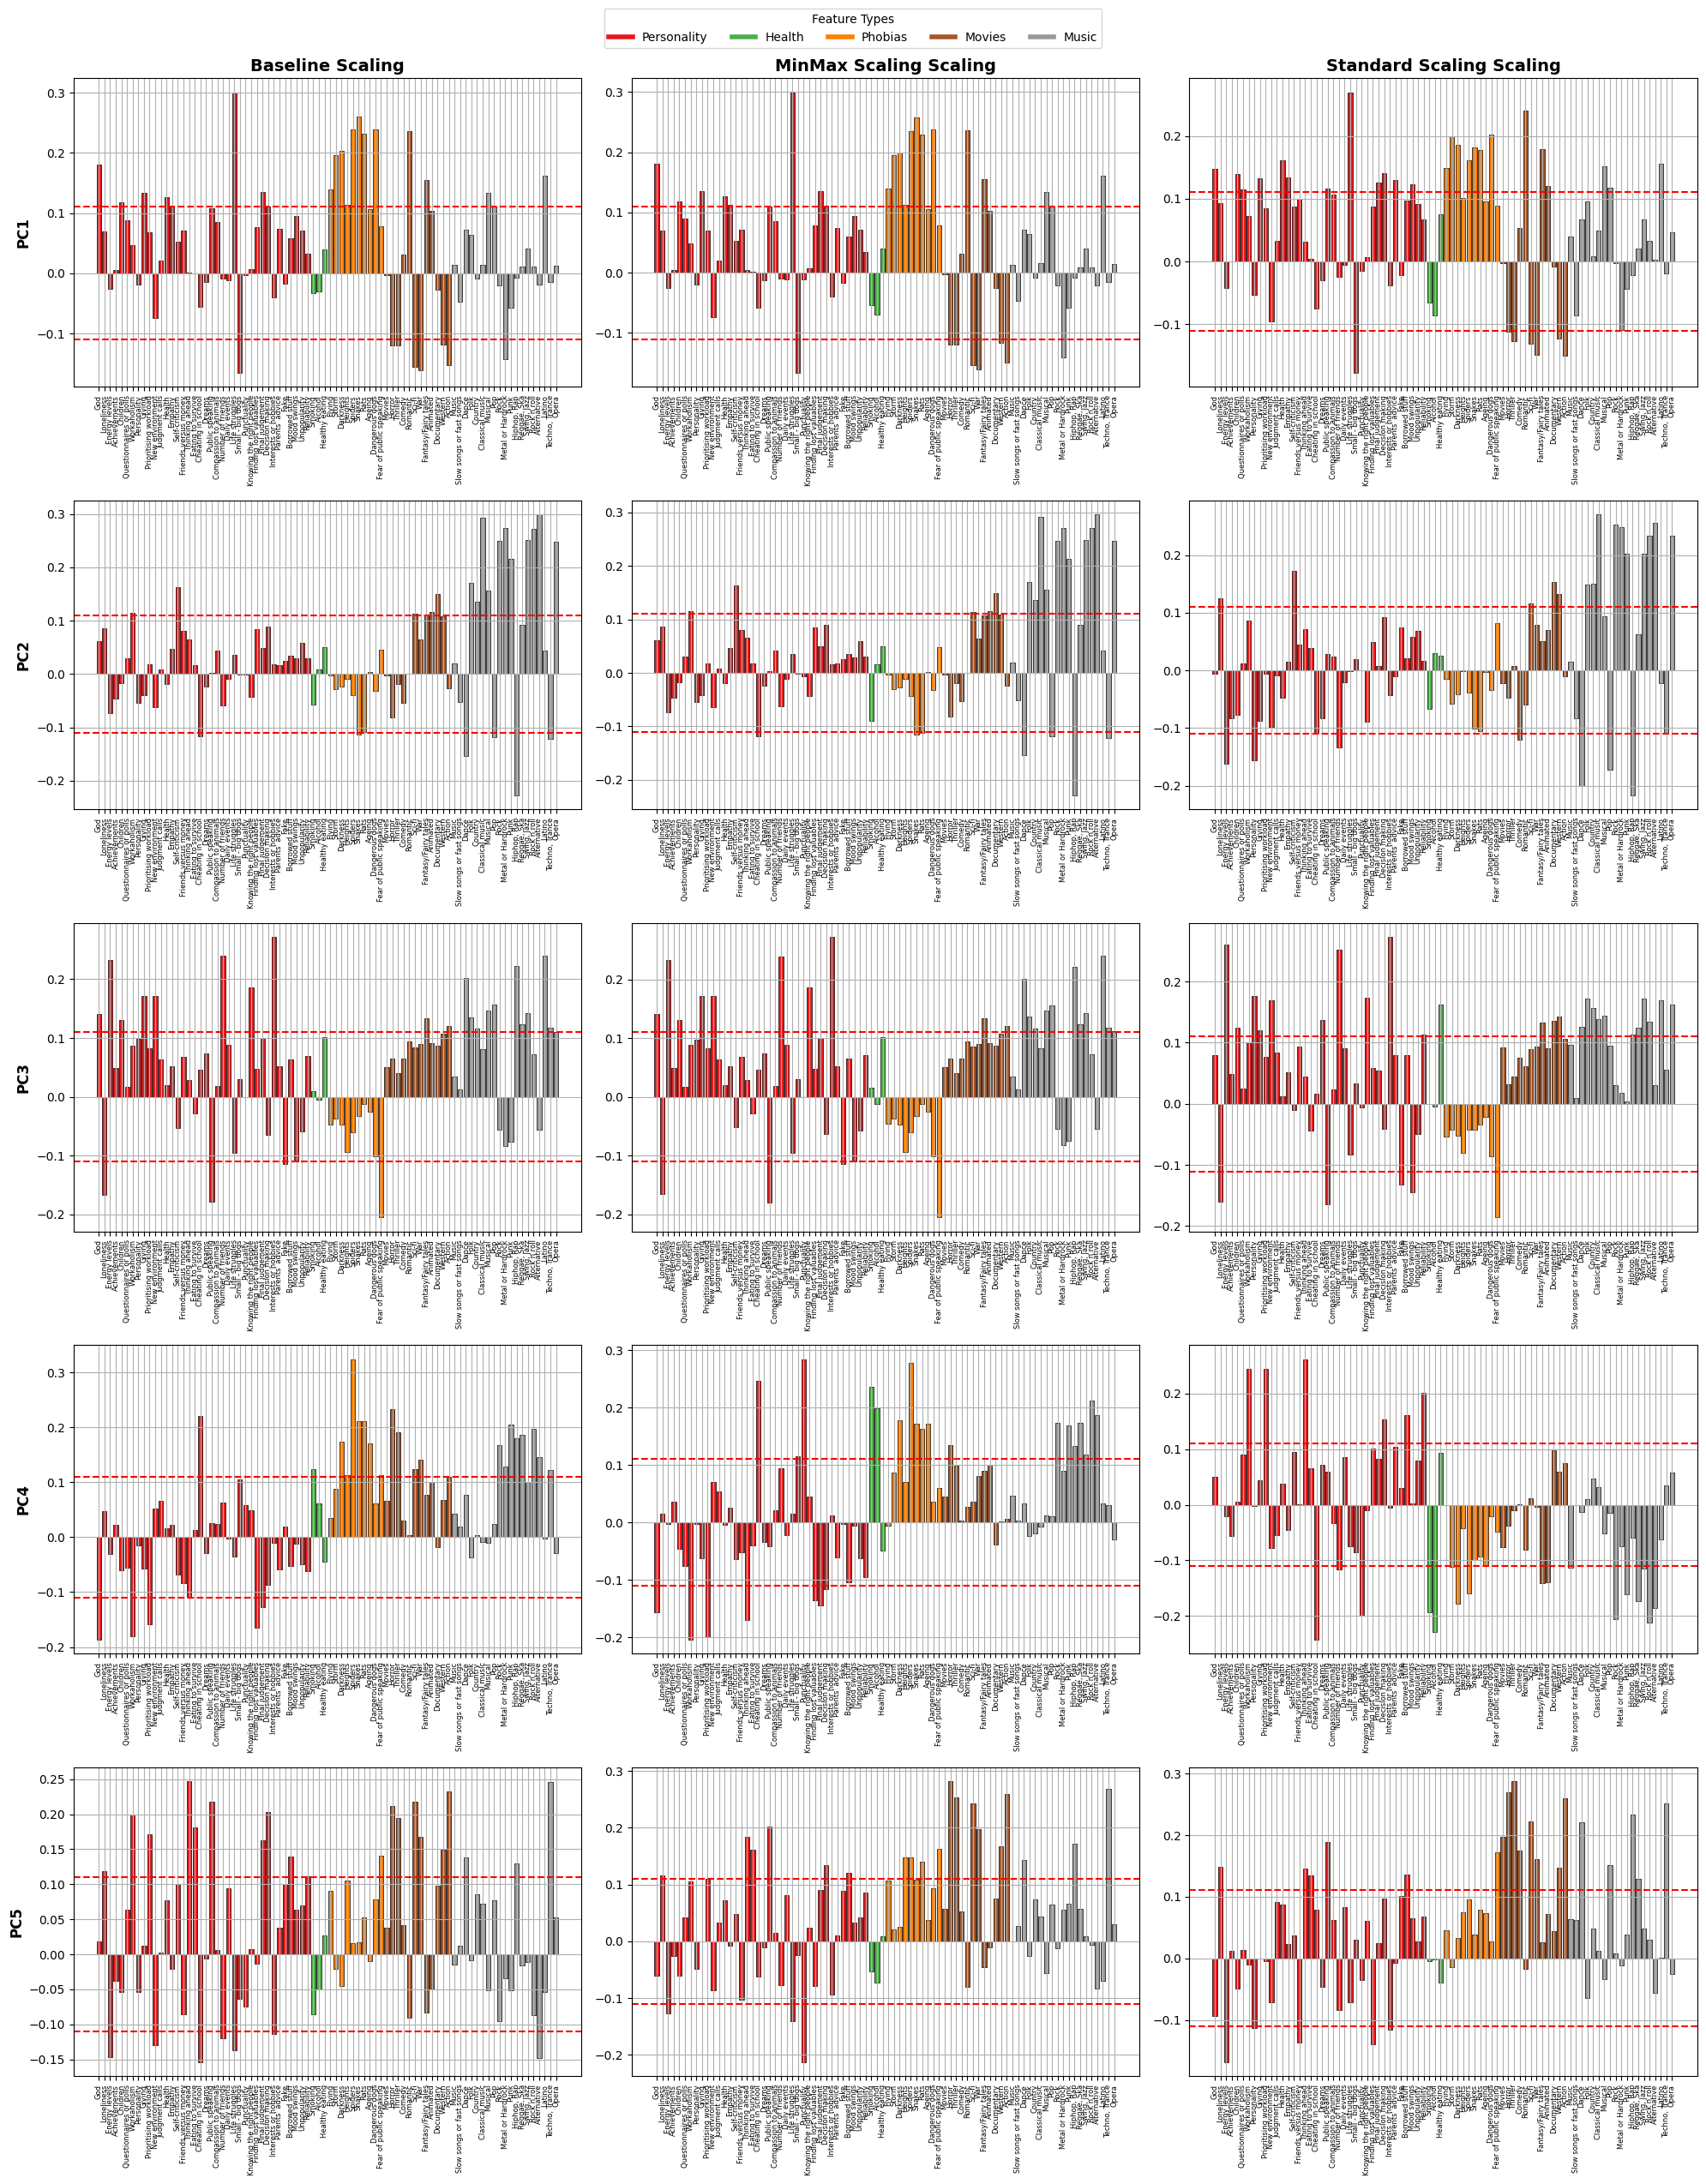

In [22]:
# plot pca results for each component across different scaling methods
# create legend handles for feature types
legend_handles = [
    plt.Line2D([0], [0], color=color, lw=4, label=type_)
    for type_, color in TYPE_COLOR_MAPPING.items()
]

max_m = max(TRANSFORMATION_MS.values())

fig, axes = plt.subplots(max_m, 3, figsize=(20, max_m * 5))

for col_idx, (transformation, pca_instance) in enumerate(PCA_DICTIONARY.items()):
    num_pcs = TRANSFORMATION_MS[transformation]
    # calculate threshold for coefficients
    eps = np.sqrt(1 / pca_instance.n_features_in_)
    # plot pca components for each scaling method
    for pc_idx in range(num_pcs):
        ax = axes[pc_idx, col_idx] if num_pcs > 1 else axes[col_idx]

        # create bar plot for pca coefficients
        ax.bar(np.arange(pca_instance.n_features_in_), pca_instance.components_[pc_idx, :], 
               color=COLORS[:pca_instance.n_features_in_], edgecolor="black", linewidth=0.5)

        # add threshold lines for significant coefficients
        ax.axhline(y=eps, color="red", linestyle="--", linewidth=1.5)
        ax.axhline(y=-eps, color="red", linestyle="--", linewidth=1.5)

        # customize x-axis with feature names
        ax.set_xticks(np.arange(pca_instance.n_features_in_))
        ax.set_xticklabels(these_features, rotation=90, ha="center", fontsize=6)

        if pc_idx == 0:
            ax.set_title(f"{transformation} Scaling", fontsize=14, weight="bold")
        if col_idx == 0:
            ax.set_ylabel(f"PC{pc_idx + 1}", fontsize=12, weight="bold")

        ax.grid()


fig.legend(handles=legend_handles, loc="upper center", ncol=len(these_types), title="Feature Types", frameon=True, bbox_to_anchor=(0.5, 1.02)) 
plt.tight_layout()
plt.show()

In [23]:
# remove the baseline data from the dictionaries, since we won't use it for further analysis
PCA_DICTIONARY.pop("Baseline")
TRANSFORMATION_MS.pop("Baseline")
REDUCED_DATA_DICTIONARY.pop("Baseline")
print("Removed Baseline key: value from PCA_DICTIONARY, TRANSFORMATION_MS and REDUCED_DATA_DICTIONARY")

Removed Baseline key: value from PCA_DICTIONARY, TRANSFORMATION_MS and REDUCED_DATA_DICTIONARY


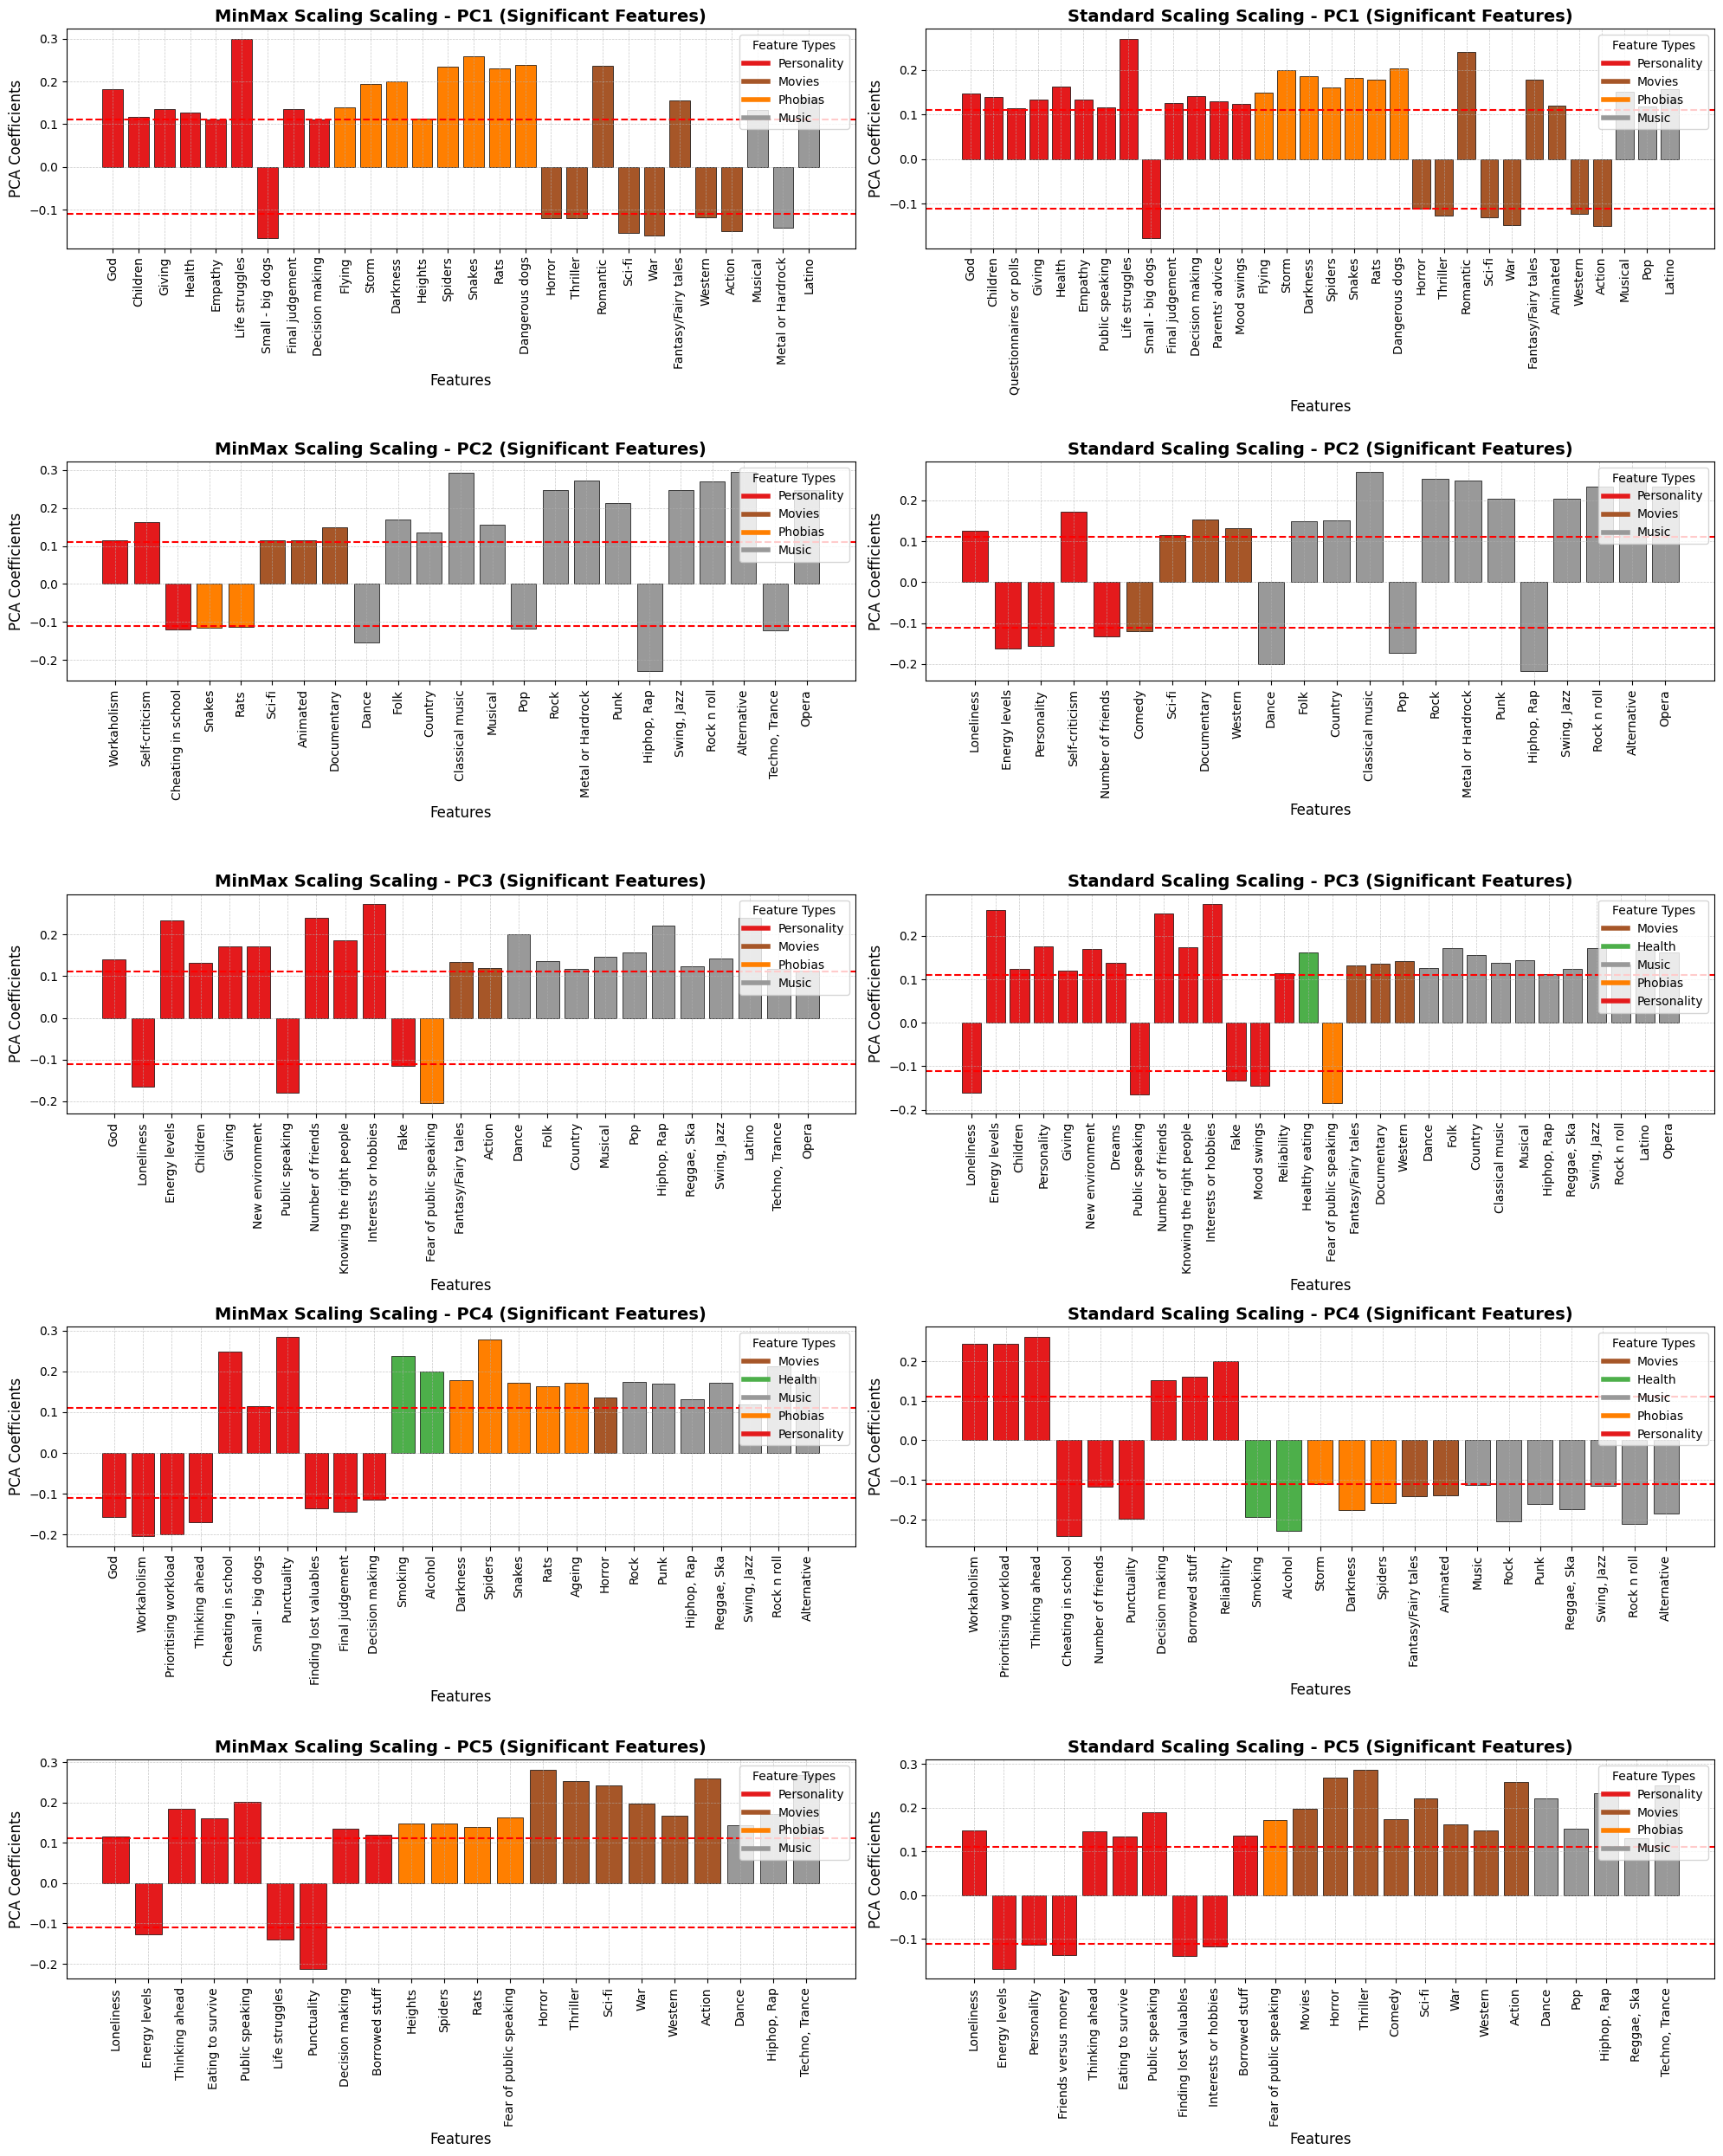

In [24]:
max_m = max(TRANSFORMATION_MS.values())
fig, axes = plt.subplots(max_m, 2, figsize=(20, max_m * 5))

for col_idx, (transformation, pca_instance) in enumerate(PCA_DICTIONARY.items()):    
    num_pcs = TRANSFORMATION_MS[transformation]
    eps = np.sqrt(1 / pca_instance.n_features_in_)  # Threshold for coefficients
    
    for pc_idx in range(num_pcs):
        significant_features = [
            (feature, coefficient)
            for feature, coefficient in zip(these_features, pca_instance.components_[pc_idx, :])
            if abs(coefficient) > eps
        ]
        
        ax = axes[pc_idx, col_idx] if num_pcs > 1 else axes[col_idx]
        if significant_features:
            significant_colors = [
                TYPE_COLOR_MAPPING[feature_to_type[feature]]
                for feature, _ in significant_features
            ]

            # Create bar plot
            ax.bar(
                [feature for feature, _ in significant_features],
                [coefficient for _, coefficient in significant_features],
                color=significant_colors,
                edgecolor="black",
                linewidth=0.5,
            )

            # Threshold lines
            ax.axhline(y=eps, color="red", linestyle="--", linewidth=1.5, label="Threshold")
            ax.axhline(y=-eps, color="red", linestyle="--", linewidth=1.5)

            ax.set_xticks(np.arange(len(significant_features)))            
            ax.set_xticklabels([feature for feature, _ in significant_features], rotation=90, ha="center", fontsize=10)

            # Titles and labels
            ax.set_title(f"{transformation} Scaling - PC{pc_idx + 1} (Significant Features)", fontsize=14, weight="bold")
            ax.set_xlabel("Features", fontsize=12)
            ax.set_ylabel("PCA Coefficients", fontsize=12)

            # Dynamic legend
            unique_types = set(feature_to_type[feature] for feature, _ in significant_features)
            legend_handles = [
                plt.Line2D([0], [0], color=TYPE_COLOR_MAPPING[type_], lw=4, label=type_)
                for type_ in unique_types
            ]
            ax.legend(handles=legend_handles, loc="upper right", title="Feature Types")
            ax.grid(visible=True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [25]:
# function to analyze pca components and categorize features based on their contributions
def analyze_pca_components(pca_result, 
                           features=these_features, 
                           feature_types=these_types, 
                           feature_to_type=feature_to_type, 
                           columns_mapping=columns_mapping, 
                           num_components=5):
    
    # threshold for significant coefficients in pca components
    eps = np.sqrt(1 / pca_result.n_features_in_)

    # helper function to categorize features based on their indices and component values
    def categorize_components(indices, components):
        categorized_dict = {category: [] for category in feature_types}  # initialize dictionary by categories
        for i in indices:
            feature = features[i]  # get the feature name
            category = feature_to_type[feature]  # get the category of the feature
            mapped_feature = columns_mapping[feature]  # get the display name for the feature
            component_value = str(components[i].round(3))  # round component value for readability
            categorized_dict[category].append(f"{mapped_feature} ( = {component_value})")  # append to category
        return categorized_dict

    # helper function to print categorized components with a title
    def print_categorized_components(title, categorized_dict):
        print(f"\n{title}\n")
        for category, values in categorized_dict.items():
            if values:
                print(f"- {category} ({len(values)} items):")
                print(f"    {values}")

    # analyze each principal component up to the specified number
    for pc_index in range(num_components):
        components = pca_result.components_[pc_index, :]  # extract component values for the current pc
        significant_pos_indices = np.argwhere(components >= eps).flatten()  # indices of significant positive values
        significant_neg_indices = np.argwhere(components <= -eps).flatten()  # indices of significant negative values

        # categorize significant positive and negative contributions
        pos_dict = categorize_components(significant_pos_indices, components)
        neg_dict = categorize_components(significant_neg_indices, components)

        # print results for the current principal component
        print(f"\n****************** PC{pc_index + 1} **********************")
        print_categorized_components("HIGH-VALUED POSITIVE COMPONENTS PER CATEGORY:", pos_dict)
        print_categorized_components("HIGH-VALUED NEGATIVE COMPONENTS PER CATEGORY:", neg_dict)
        print("*********************************************")

In [26]:
minmax_pca = PCA_DICTIONARY["MinMax Scaling"]
analyze_pca_components(minmax_pca, these_features, these_types, feature_to_type, columns_mapping)


****************** PC1 **********************

HIGH-VALUED POSITIVE COMPONENTS PER CATEGORY:

- Personality (8 items):
    ['I believe in God. ( = 0.181)', "I enjoy childrens' company. ( = 0.118)", 'I try to give as much as I can to other people at Christmas. ( = 0.135)', 'I worry about my health. ( = 0.127)', 'I am emphatetic person. ( = 0.112)', "I cry when I feel down or things don't go the right way. ( = 0.3)", 'I believe that bad people will suffer one day and good people will be rewarded. ( = 0.136)', 'I take my time to make decisions. ( = 0.111)']
- Phobias (8 items):
    ['Flying ( = 0.14)', 'Thunder, lightning ( = 0.195)', 'Darkness ( = 0.2)', 'Heights ( = 0.112)', 'Spiders ( = 0.235)', 'Snakes ( = 0.258)', 'Rats, mice ( = 0.229)', 'Dangerous dogs ( = 0.238)']
- Movies (2 items):
    ['Romantic movies ( = 0.236)', 'Tales ( = 0.155)']
- Music (2 items):
    ['Musicals ( = 0.134)', 'Latin ( = 0.161)']

HIGH-VALUED NEGATIVE COMPONENTS PER CATEGORY:

- Personality (1 items):
    

### **Principal Components Interpretation (MinMax Scaling)** 
- - -
#### **PC1: Sensitive, Expressive (+) v.s. Confident, Assertive (-)**

**High-Valued Positive Components:**

- **Personality**: The positive components suggest individuals with a strong emotional side. High empathy and sensitivity to others’ needs (e.g., "I am an empathetic person" and "I try to give as much as I can to others at Christmas"). They express their emotions openly, evident in responses like "I cry when I feel down or things don't go the right way" (highest coefficient). Strong belief in justice and spirituality, shown by statements such as "I believe that bad people will suffer one day" and "I believe in God." → **Sensitive**

- **Phobias**: The phobias listed highlight a heightened sensitivity to danger or threats. Significant fears include snakes, spiders, and dangerous dogs. This trend suggests individuals highly attuned to environmental risks. → **Anxious**

- **Movies**: A preference for romantic movies and tales suggests they are drawn to narratives about emotional depth, love, and human connection. They may appreciate themes of hope and overcoming adversity in relationships, showing a sentimental side. → **Sentimental**

- **Music**: A strong appreciation for musicals and Latin music reveals a vibrant, expressive nature. This highlights their love for rhythm, storytelling, and engaging, emotionally evocative experiences. → **Expressive**


**High-Valued Negative Components:**

- **Personality**: Preference for big, dangerous dogs over smaller, calmer ones reflects a personality that values projecting courage, confidence, and the ability to handle challenging situations. This preference may symbolize resilience, strength, and a desire to command respect. → **Toughness**

- **Movies**: Appreciation for genres like horror, sci-fi, and war reflects interest in adventurous, intense, and action-packed narratives. Suggests an interest in themes that explore conflict, courage, and adventurous scenarios. This indicates a personality drawn to excitement, intensity, and perhaps stories of overcoming obstacles or asserting power. → **Adventurous and Thrill-seeking**

- **Music**: Preference for metal or hard rock indicates enjoyment of high-energy, intense music with themes of rebellion and individuality. This suggests a personality that values self-expression, independence, and a willingness to defy convention. → **Rebellious**

- - -

#### **PC2: Cultural Curiosity and Artistic Engagement (+) vs. Pragmatic Simplicity (-)**

**High-Valued Positive Components:**

- **Personality:** The positive components suggest individuals who are diligent and reflective. They often use their spare time for studying or working, highlighting a strong work ethic. Additionally, they frequently reflect on their decisions, indicating a thoughtful and introspective nature. → **Hardworking and Thoughtful**

- **Movies:** A preference for documentaries, cartoons, and sci-fi movies underscores a strong curiosity and imaginative nature. These individuals enjoy learning and exploring creative and futuristic narratives. → **Curious and Imaginative**

- **Music:** A wide range of musical preferences, including folk, country, classical, musicals, rock, punk, swing, jazz, opera, and alternative music, reflects a deep passion for diverse artistic expressions. Preferences for classical music, opera, and musicals signify a taste for intricate compositions. Meanwhile, a love for rock, metal, and punk highlights an appreciation for energetic and rebellious forms of expression. This breadth suggests a creative and open-minded personality. → **Artistic and Culturally Open**

**High-Valued Negative Components:**

- **Personality:** A lower association with cheating in school reflects a preference for ethical and straightforward behaviors. → **Honest and Principled**

- **Phobias:** Less concern about snakes and rats indicates a pragmatic approach to fears, suggesting a level of emotional resilience. → **Resilient and Practical**

- **Music:** Preferences for pop, dance, hip hop, and techno music are comparatively lower, highlighting a tendency to avoid mainstream, high-energy, or rhythm-focused genres. This suggests a preference for more niche or complex musical styles. → **Selective and Sophisticated**


- - -

#### **PC3: Extroversion and Sociability (+) vs. Introversion and Sensitivity (-)**

**High-Valued Positive Components:**

- **Personality:** The positive components suggest individuals who are extroverted, energetic, and socially adept. They are full of life and energy, have many friends, and easily adapt to new environments. Traits like generosity during Christmas and a strong belief in connecting with the right people reflect kindness and social awareness. Their diverse hobbies and interests further indicate an open-minded and curious nature. → **Energetic, Sociable, and Open-Minded**

- **Movies:** A preference for tales and action movies points to individuals who enjoy exciting and imaginative narratives. These genres align with a sense of adventure and a love for dynamic storytelling. → **Adventurous and Imaginative**

- **Music:** Preferences for dance, hip-hop, Latin, and pop music reflect a love for rhythmic, energetic, and socially engaging tunes, often associated with active and vibrant social lives. This extends to a broader appreciation for musicals, swing, jazz, and even opera, suggesting a diverse taste in music. → **Rhythmic, Energetic, and Socially Engaged**


**High-Valued Negative Components:**

- **Personality:** This side reflects an introverted and emotionally sensitive individual. Traits like feeling lonely, requiring preparation for public speaking, and occasionally being "two-faced" suggest introspection, cautiousness, and emotional complexity. These individuals are reflective and deliberate in their social interactions. → **Introspective, Emotionally Complex, and Thoughtful**

- **Phobias:** The fear of public speaking aligns with a preference for careful preparation and a self-aware approach to communication, characteristic of introverted tendencies. → **Cautious and Self-Aware**

- - - 
 
#### **PC4: Impulsive and Sensation-Seeking (+) vs. Responsible and Reflective (-)**

**High-Valued Positive Components:**

- **Personality:** Traits like cheating at school and poor timekeeping suggest a more impulsive nature. The preference for big, dangerous dogs indicates an appreciation for boldness and strength, further aligning with an adventurous and unrestrained personality. → **Impulsive and Adventurous**

- **Health:** Positive associations with smoking and drinking habits reflect a tendency to seek immediate gratification and potentially cope with stress through quick fixes. This aligns with impulsivity and a sensation-seeking mindset. → **Sensation-Seeking and Coping-Oriented**

- **Phobias:** Fear of darkness, spiders, snakes, rats, and aging suggests heightened sensitivity to perceived threats and anxieties about mortality or physical decline. → **Sensitive and Reactive**

- **Movies:** A preference for horror movies indicates a love for adrenaline and thrill, consistent with a sensation-seeking personality. → **Adrenaline-Seeking**

- **Music:** Preference for rock, punk, reggae, ska, jazz, and alternative music reflects a taste for expressive, intense, and countercultural forms of art, often associated with rebellious or creative energies. → **Energetic and Expressive**

**High-Valued Negative Components:**

- **Personality:** Negative components reflect a conscientious, reflective, and moral personality. Traits such as a belief in God, handing in lost belongings, completing tasks on time, and thorough decision-making indicate a responsible and ethical approach to life. These individuals value structure and careful consideration in their actions. → **Responsible, Reflective, and Principled**

- - -

#### **PC5: Reflective and Intense (+) vs. Energetic and Expressive (-)**

**High-Valued Positive Components:**

- **Personality:** Positive components highlight individuals who are introspective, cautious, and deliberate. They take time to make decisions, look at situations from different angles, and prioritize preparedness, especially in public speaking. The emphasis on borrowing responsibility and a utilitarian approach to eating also suggests a highly pragmatic and disciplined nature. → **Reflective and Responsible**

- **Phobias:** Fears related to heights, spiders, rats, and public speaking reflect sensitivity to potential risks and judgments, suggesting a cautious and risk-averse personality. → **Cautious and Risk-Aware**

- **Movies:** A strong preference for horror, thriller, sci-fi, war, western, and action movies reveals a love for adrenaline-pumping and intellectually stimulating narratives. These genres align with an appreciation for intensity and exploration of complex themes. → **Thrill-Seeking and Adventurous**

- **Music:** Preferences for dance, hip-hop, and techno music highlight a love for high-energy and rhythmic experiences, often enjoyed in social or stimulating environments. → **Rhythmic and Energetic**

**High-Valued Negative Components:**

- **Personality:** Negative components reflect a more spontaneous and emotionally expressive personality. Traits like being full of energy, openly crying in emotional moments, and less focus on punctuality suggest a vibrant, lively, and emotionally open nature. → **Energetic and Emotionally Expressive**


In [27]:
standard_pca = PCA_DICTIONARY["Standard Scaling"]
analyze_pca_components(standard_pca, these_features, these_types, feature_to_type, columns_mapping)


****************** PC1 **********************

HIGH-VALUED POSITIVE COMPONENTS PER CATEGORY:

- Personality (12 items):
    ['I believe in God. ( = 0.147)', "I enjoy childrens' company. ( = 0.139)", 'I enjoy taking part in surveys. ( = 0.114)', 'I try to give as much as I can to other people at Christmas. ( = 0.133)', 'I worry about my health. ( = 0.162)', 'I am emphatetic person. ( = 0.134)', 'I have to be well prepared before public speaking. ( = 0.115)', "I cry when I feel down or things don't go the right way. ( = 0.269)", 'I believe that bad people will suffer one day and good people will be rewarded. ( = 0.126)', 'I take my time to make decisions. ( = 0.141)', "I always listen to my parents' advice. ( = 0.13)", 'My moods change quickly. ( = 0.123)']
- Phobias (7 items):
    ['Flying ( = 0.149)', 'Thunder, lightning ( = 0.2)', 'Darkness ( = 0.186)', 'Spiders ( = 0.161)', 'Snakes ( = 0.181)', 'Rats, mice ( = 0.177)', 'Dangerous dogs ( = 0.202)']
- Movies (3 items):
    ['Romantic 

### **Principal Components Interpretation (StandardScaler)** 
- - -

#### **PC1: Sensitive, Expressive (+) vs. Confident, Assertive (-)**

**High-Valued Positive Components:**

- **Personality:** Positive components reflect a personality grounded in emotional sensitivity, moral values, and relational tendencies. Traits like enjoying children’s company, participating in surveys, giving generously at Christmas, and listening to parental advice highlight a nurturing and conscientious nature. Emotional sensitivity is underscored by tendencies such as worrying about health and experiencing quick mood changes. → **Sensitive, Nurturing, and Conscientious**

- **Phobias:** A significant presence of phobias related to environmental risks and animals reflects heightened caution and sensitivity to external stimuli, suggesting a personality highly attuned to potential dangers. → **Cautious and Anxious**

- **Movies:** A preference for romantic movies, tales, and cartoons points to an affinity for emotionally rich, imaginative, and hopeful narratives. → **Sentimental and Imaginative**

- **Music:** Appreciation for musicals, pop, and Latin music highlights a vibrant and expressive personality, with a love for engaging, rhythmic, and socially dynamic experiences. → **Expressive and Social**

**High-Valued Negative Components:**

- **Personality:** A preference for big, dangerous dogs reflects traits associated with projecting strength, confidence, and assertiveness. → **Confident and Tough**

- **Movies:** A strong interest in genres like horror, thriller, sci-fi, war, western, and action movies suggests an adventurous, bold, and thrill-seeking personality. These preferences point to a fascination with narratives involving intensity, conflict, and heroism. → **Adventurous and Brave**

- **Music:** A preference for metal, hard rock, and punk music reveals a rebellious streak, aligning with themes of individuality, intensity, and countercultural expression. → **Rebellious and Independent**


- - -

#### **PC2: Cultural Curiosity and Artistic Engagement (+) vs. Vibrant and Socially Energetic (-)**

**High-Valued Positive Components:**

- **Personality:** Positive components indicate a reflective and introspective personality. Traits such as frequently thinking about and regretting decisions, and experiencing loneliness, suggest a thoughtful, sensitive, and inwardly focused individual. → **Reflective and Sensitive**

- **Movies:** A preference for documentaries, sci-fi, and western movies points to an interest in imaginative and thought-provoking narratives, as well as historical and adventurous themes. → **Imaginative and Adventurous**

- **Music:** A wide appreciation for folk, country, classical, opera, rock, punk, and alternative music suggests a passion for diverse and artistic expressions. These preferences indicate a love for rhythmic diversity, cultural richness, and both sophisticated and intense styles of music. → **Culturally Open and Artistically Passionate**


**High-Valued Negative Components:**

- **Personality:** Traits such as being full of life and energy, having a positive self-view, and maintaining a large circle of friends highlight an extroverted and confident personality. These individuals exhibit vibrancy, self-assurance, and sociability. → **Energetic and Sociable**

- **Movies:** A preference for comedies indicates a love for light-hearted, humorous, and entertaining content, suggesting an easy-going and approachable personality. → **Playful and Light-Hearted**

- **Music:** Preferences for dance, disco, funk, pop, and hip-hop reflect a love for high-energy, socially engaging, and rhythm-driven music. This aligns with an expressive and socially active personality. → **Expressive and Socially Engaged**

- - -

#### **PC3: Extroversion and Social Confidence (+) vs. Introversion and Emotional Sensitivity (-)**

**High-Valued Positive Components:**

- **Personality:** Positive traits highlight extroversion, self-assurance, and social adaptability. Traits like being full of energy, maintaining a positive self-image, and having a strong network of friends reflect a vibrant and optimistic personality. Additional traits such as reliability, adaptability, and a variety of hobbies indicate social intelligence and proactive engagement. → **Extroverted, Optimistic, and Proactive**

- **Health:** A healthy lifestyle aligns with discipline and self-awareness, reinforcing the proactive and socially engaged tendencies of this component. → **Health-Conscious and Disciplined**

- **Movies:** Preferences for tales, documentaries, and western movies indicate a love for diverse storytelling, blending imagination with historical and adventurous themes. This suggests intellectual curiosity and a sense of exploration. → **Imaginative and Explorative**

- **Music:** A broad appreciation for genres like folk, country, classical, opera, musicals, and jazz highlights cultural openness and a passion for artistic diversity. Simultaneously, interests in hip-hop, reggae, and Latin music point to rhythmic and socially engaging tendencies. → **Culturally Open and Socially Vibrant**

**High-Valued Negative Components:**

- **Personality:** Negative components represent traits in the opposite axis, highlighting introspection, emotional sensitivity, and self-awareness. Traits like feelings of loneliness, mood swings, and being "two-faced" suggest emotional complexity and a reflective nature. These individuals may prefer thoughtful deliberation, especially in public or social settings. → **Introspective, Emotionally Complex, and Thoughtful**

- **Phobias:** A fear of public speaking emphasizes caution and anxiety in performance-based social situations, reflecting vulnerability and careful preparation. → **Cautious and Self-Aware**


- - -

#### **PC4: Responsible and Disciplined (+) vs. Impulsive and Free-Spirited (-)**

**High-Valued Positive Components:**

- **Personality:** Traits such as studying or working in spare time, completing tasks promptly, examining situations from all angles, and maintaining reliability reflect a disciplined and conscientious personality. A focus on taking care of borrowed items and thorough decision-making reinforces responsibility and integrity. → **Disciplined, Conscientious, and Responsible**

**High-Valued Negative Components:**

- **Personality:** Traits like having many friends, occasional cheating at school, and flexible timekeeping reflect a free-spirited and socially adaptive personality. This combination suggests a person who values spontaneity and relationships over rigid rules. → **Socially Adaptive and Spontaneous**

- **Health:** Smoking and drinking tendencies suggest a thrill-seeking personality, prioritizing immediate gratification or coping mechanisms over long-term health. → **Thrill-Seeking and Relaxed**

- **Phobias:** Sensitivity to fears such as darkness, spiders, and thunderstorms suggests a cautious yet reactive personality, attuned to environmental risks. → **Cautious and Sensitive**

- **Movies:** Preferences for tales and cartoons point to an imaginative and playful personality, enjoying lighthearted and creative narratives. → **Imaginative and Playful**

- **Music:** Strong preferences for rock, punk, reggae, ska, and alternative music reflect a love for expressive, energetic, and countercultural forms of art. These choices highlight individuality and dynamic creativity. → **Expressive, Creative, and Dynamic**


- - -

#### **PC5: Disciplined and Reflective (+) vs. Energetic and Sociable (-)**

**High-Valued Positive Components:**

- **Personality:** Positive traits emphasize discipline, introspection, and responsibility. Traits such as preparing thoroughly for public speaking, looking at things from all angles, and maintaining borrowed items highlight a thoughtful and conscientious nature. Feelings of loneliness and a pragmatic approach to eating further reflect a reserved and inward-focused personality. → **Disciplined, Thoughtful, and Responsible**

- **Phobias:** A fear of public speaking aligns with cautiousness and the need for control in judgmental or high-stakes scenarios, consistent with a reflective personality. → **Cautious and Prepared**

- **Movies:** A strong preference for intense genres such as horror, thriller, sci-fi, war, western, and action movies reflects a love for adrenaline-filled, intellectually stimulating narratives. Additionally, a preference for comedies indicates a balanced personality that appreciates both intensity and humor. → **Adventurous and Balanced**

- **Music:** A liking for dance, hip-hop, pop, and techno music reflects a preference for energetic and rhythmic experiences, often associated with vibrant environments. This suggests a structured appreciation for dynamic settings. → **Energetic and Rhythmic**


**High-Valued Negative Components:**

- **Personality:** Negative components highlight traits like being full of energy, valuing friendships over material wealth, and maintaining a positive self-image. These individuals are outgoing, sociable, and adaptable, thriving in dynamic and interactive environments. → **Energetic, Outgoing, and Adaptable**

- **Movies:** A preference for a wide range of movies, including lighthearted genres like comedies, reflects a playful and open-minded personality, balancing humor with adventurous storytelling. → **Playful and Open-Minded**

- **Music:** A strong affinity for rhythmic and expressive genres like reggae, ska, and alternative music indicates a creative and socially engaged personality, enjoying a mix of individuality and connection. → **Creative and Socially Engaged**


In [28]:
pc_names = {"MinMax Scaling": ["Sensitive, Expressive (+) vs. Confident, Assertive (-)", 
                        "Cultural Curiousity, Artistical Engagement (+) vs. Pragmatic Simplicity (-)", 
                        "Extroversion and Sociability (+) vs. Introversion and Sensitivity (-)"], 
            "Standard Scaling": ["Sensitive, Expressive (+) vs. Confident, Assertive (-)",
                        "Cultural Curiosity, Artistical Engagement (+) vs. Vibrant and Socially Energetic (-)",
                        "Extroversion with Self-Assurance (+) vs. Introversion and Sensitivity (-)"]}

In [29]:
for col, dtype in zip(y_df.columns, y_df.dtypes):
    print(f"Column: {col}")
    print(f"  Datatype: {dtype}")
    if dtype == "object":
        unique_values = y_df[col].unique()
        print(f"    Unique values: {unique_values}\n")      
    else:
        minimum, maximum = y_df[col].min(), y_df[col].max()
        _range = maximum - minimum
        mean, variance =  y_df[col].mean(), y_df[col].var()
        print(f"    Statistics: Maximum Value = {maximum}    |    Minimum Value = {minimum}    |    Range = {_range}")
        print(f"          --->: Mean = {mean}    |    Variance = {variance}")

Column: Age
  Datatype: float64
    Statistics: Maximum Value = 30.0    |    Minimum Value = 15.0    |    Range = 15.0
          --->: Mean = 20.380228136882128    |    Variance = 7.958008328806808
Column: Height
  Datatype: float64
    Statistics: Maximum Value = 203.0    |    Minimum Value = 153.0    |    Range = 50.0
          --->: Mean = 172.96577946768062    |    Variance = 83.5988267246062
Column: Weight
  Datatype: float64
    Statistics: Maximum Value = 150.0    |    Minimum Value = 42.0    |    Range = 108.0
          --->: Mean = 65.8745247148289    |    Variance = 185.22232120224513
Column: Number of siblings
  Datatype: float64
    Statistics: Maximum Value = 10.0    |    Minimum Value = 0.0    |    Range = 10.0
          --->: Mean = 1.2889733840304183    |    Variance = 1.0058591345283363
Column: Gender
  Datatype: object
    Unique values: ['male' 'female']

Column: Hand
  Datatype: object
    Unique values: ['right' 'left']

Column: Education
  Datatype: object
    Uni

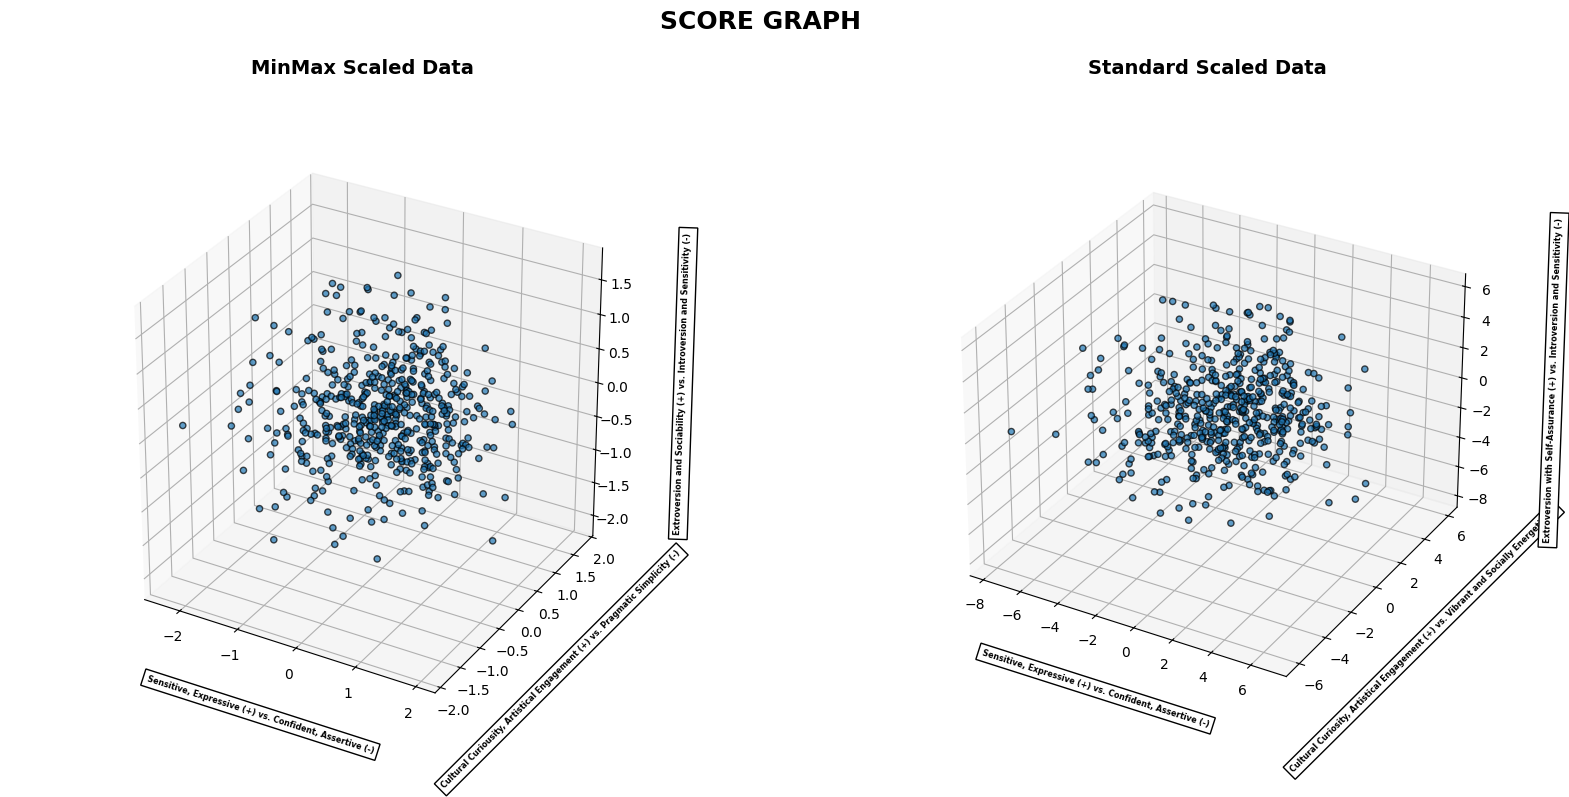

In [30]:
fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(20, 10))

# Plot for MinMax Scaled Data
Y_mm_m = REDUCED_DATA_DICTIONARY["MinMax Scaling"]
ax1 = axes[0]
ax1.scatter(
    Y_mm_m[:, 0], Y_mm_m[:, 1], Y_mm_m[:, 2],
    edgecolors="k", alpha=0.7
)
ax1.set_title("MinMax Scaled Data", fontsize=14, fontweight="bold")
ax1.set_xlabel(pc_names["MinMax Scaling"][0], labelpad=20, size="xx-small", weight="bold",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
ax1.set_ylabel(pc_names["MinMax Scaling"][1], labelpad=20, size="xx-small", weight="bold",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
ax1.set_zlabel(pc_names["MinMax Scaling"][2], labelpad=30, size="xx-small", weight="bold",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.6'))
ax1.set_box_aspect([1,1,1], zoom=0.8)


# Plot for Standard Scaled Data
Y_ss_m = REDUCED_DATA_DICTIONARY["Standard Scaling"]
ax2 = axes[1]
ax2.scatter(
    Y_ss_m[:, 0], Y_ss_m[:, 1], Y_ss_m[:, 2],
    edgecolors="k", alpha=0.7
)
ax2.set_title("Standard Scaled Data", fontsize=14, fontweight="bold")
ax2.set_xlabel(pc_names["Standard Scaling"][0], labelpad=20, size="xx-small", weight="bold",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
ax2.set_ylabel(pc_names["Standard Scaling"][1], labelpad=20, size="xx-small", weight="bold",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
ax2.set_zlabel(pc_names["Standard Scaling"][2], labelpad=30, size="xx-small", weight="bold",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.6'))
ax2.set_box_aspect(None, zoom=0.8)


# Adjust layout and title
fig.suptitle(f"SCORE GRAPH", fontsize=18, fontweight='bold', y=0.92)
plt.show()

In [31]:
def plot_labelled_score_graph(REDUCED_DATA_DICTIONARY=REDUCED_DATA_DICTIONARY, pc_names=pc_names, target=None, target_name=None):

    fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(20, 10))
    ax1, ax2 = axes[0], axes[-1]

    X_mm_m, X_std_m = REDUCED_DATA_DICTIONARY["MinMax Scaling"], REDUCED_DATA_DICTIONARY["Standard Scaling"]
    # Determine if target is numeric or binary/categorical
    if pd.api.types.is_numeric_dtype(target):  
        colormap = plt.get_cmap("hot")
        
        scatter1 = ax1.scatter(X_mm_m[:, 0], X_mm_m[:, 1], X_mm_m[:, 2],
                              c=target, cmap=colormap, edgecolors="k", alpha=0.7)

        scatter2 = ax2.scatter(X_std_m[:, 0], X_std_m[:, 1], X_std_m[:, 2],
                              c=target, cmap=colormap, edgecolors="k", alpha=0.7)

        cbar = fig.colorbar(scatter2, ax=ax2, fraction=0.02, pad=0.1)
        cbar.set_label("Target Values", fontsize=12)
        cbar.ax.tick_params(labelsize=10)

    elif target.dtype == "O" or target.nunique() <= 2:  # Binary/Categorical
        unique_labels = target.unique()
        colors = ["blue", "red"] if len(unique_labels) == 2 else plt.cm.Set1.colors[:len(unique_labels)]
        label_color_mapping = {label: colors[i] for i, label in enumerate(unique_labels)}

        for label, color in label_color_mapping.items():
            mask = target == label
            ax1.scatter(
                X_mm_m[mask, 0], X_mm_m[mask, 1], X_mm_m[mask, 2],
                label=str(label), color=color, edgecolors="k", alpha=0.7
            )

            ax2.scatter(
                X_std_m[mask, 0], X_std_m[mask, 1], X_std_m[mask, 2],
                label=str(label), color=color, edgecolors="k", alpha=0.7
            )

        # Add legend
        fig.legend(
            handles=[plt.Line2D([0], [0], marker='o', color='w', label=label,
                                markerfacecolor=color, markersize=10) for label, color in label_color_mapping.items()],
            title="Categories", loc="upper center", ncol=4, fontsize=10, title_fontsize=12)
        
    ax1.set_title("MinMax Scaled Data", fontsize=14, fontweight="bold")
    ax1.set_xlabel(pc_names["MinMax Scaling"][0], labelpad=20, size="xx-small", weight="bold", bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax1.set_ylabel(pc_names["MinMax Scaling"][1], labelpad=20, size="xx-small", weight="bold", bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax1.set_zlabel(pc_names["MinMax Scaling"][2], labelpad=30, size="xx-small", weight="bold", bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.6'))
    ax1.set_box_aspect([1,1,1], zoom=0.8)

    ax2.set_title("Standardized Data", fontsize=14, fontweight="bold")
    ax2.set_xlabel(pc_names["Standard Scaling"][0], labelpad=20, size="xx-small", weight="bold", bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax2.set_ylabel(pc_names["Standard Scaling"][1], labelpad=20, size="xx-small", weight="bold", bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax2.set_zlabel(pc_names["Standard Scaling"][2], labelpad=30, size="xx-small", weight="bold", bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.6'))
    ax2.set_box_aspect([1,1,1], zoom=0.8)

    fig.suptitle(f"SCORE GRAPH - {target_name} Analysis", fontsize=18, fontweight='bold', y=0.92)
    plt.show()


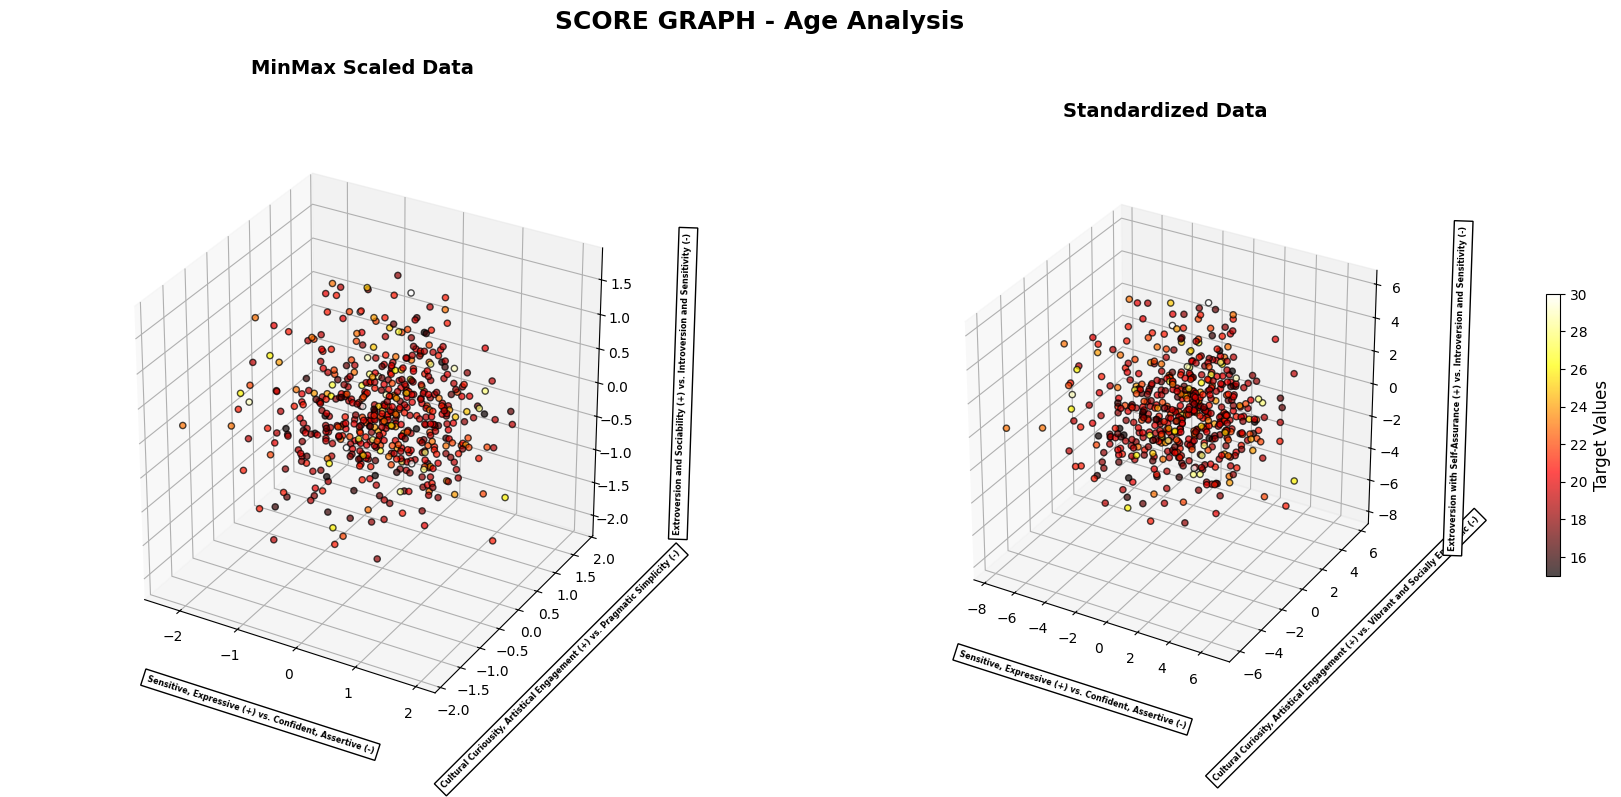

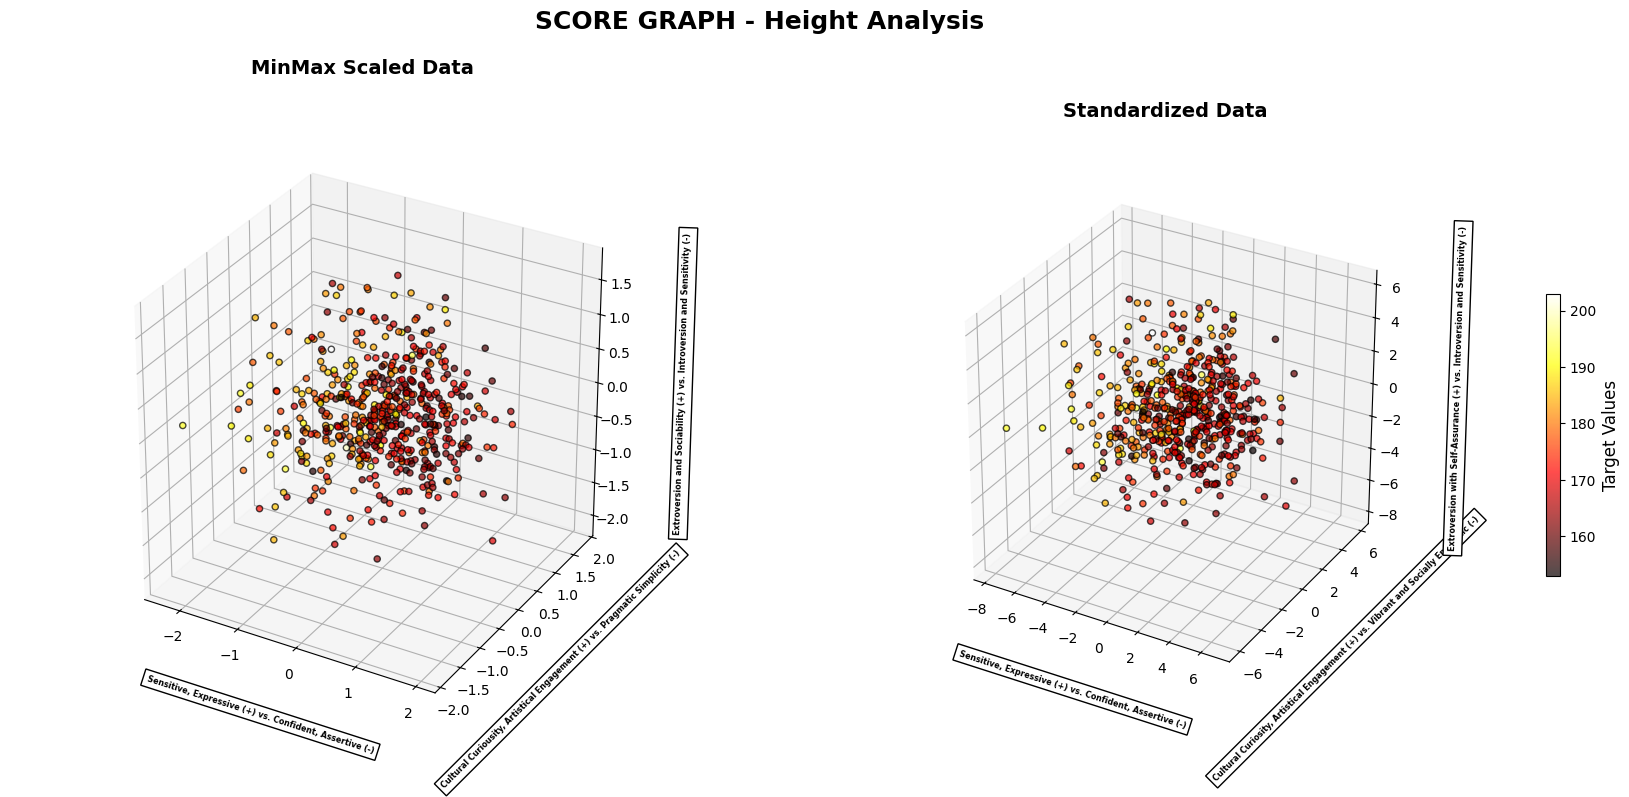

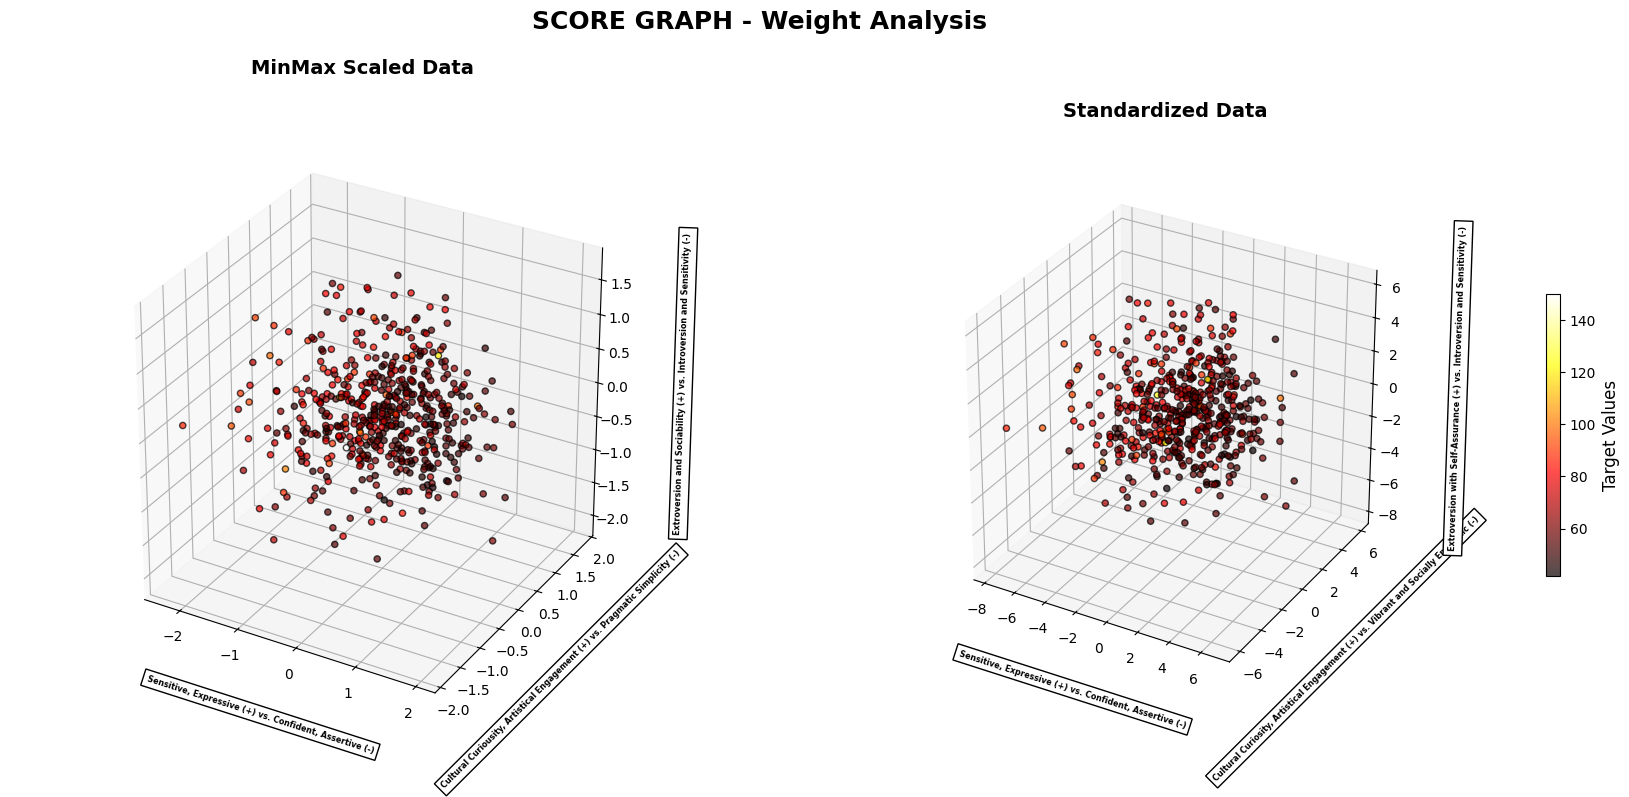

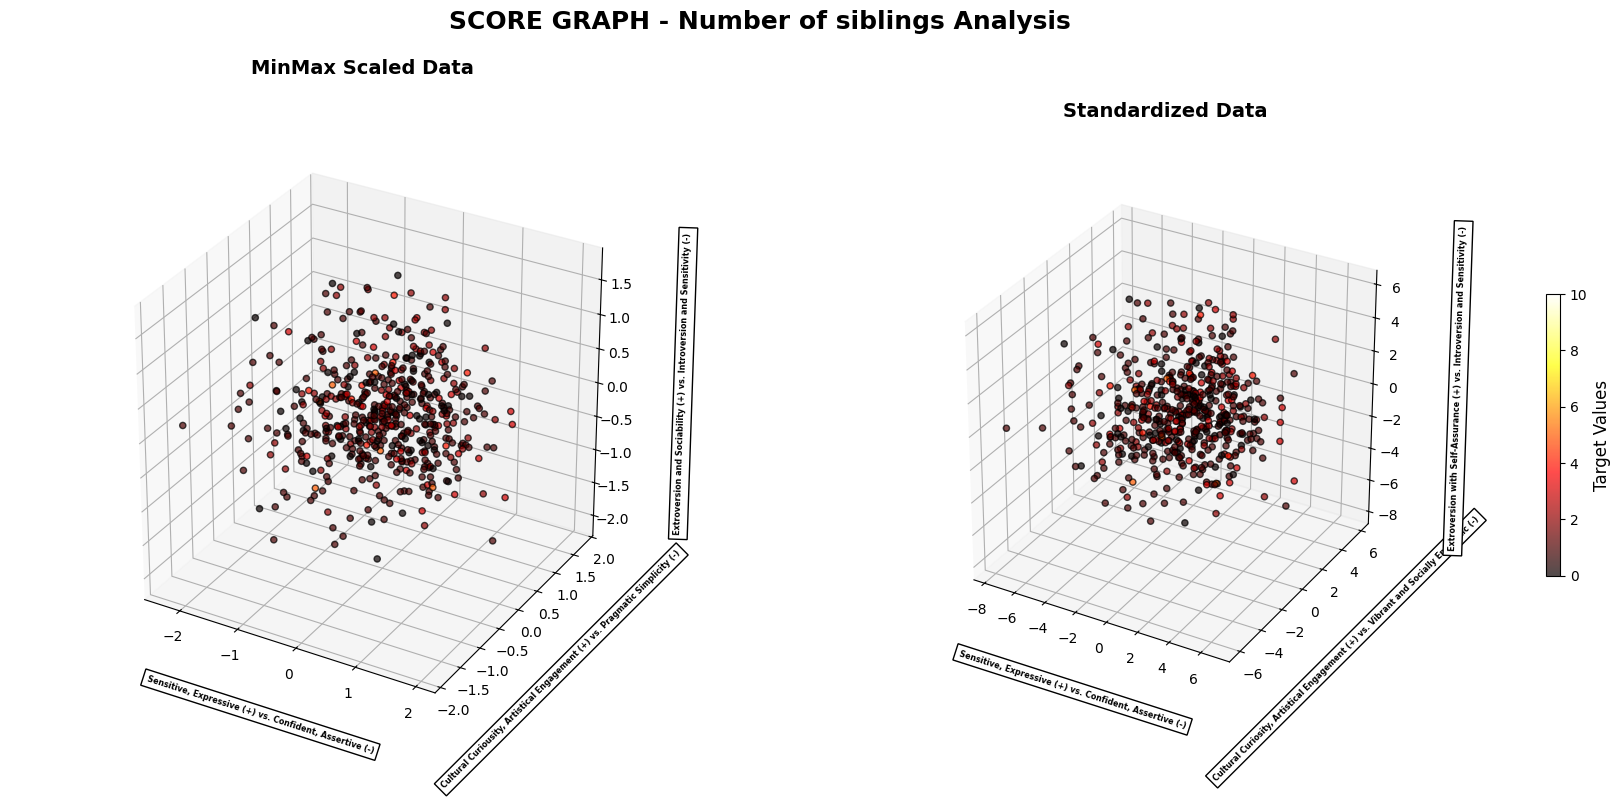

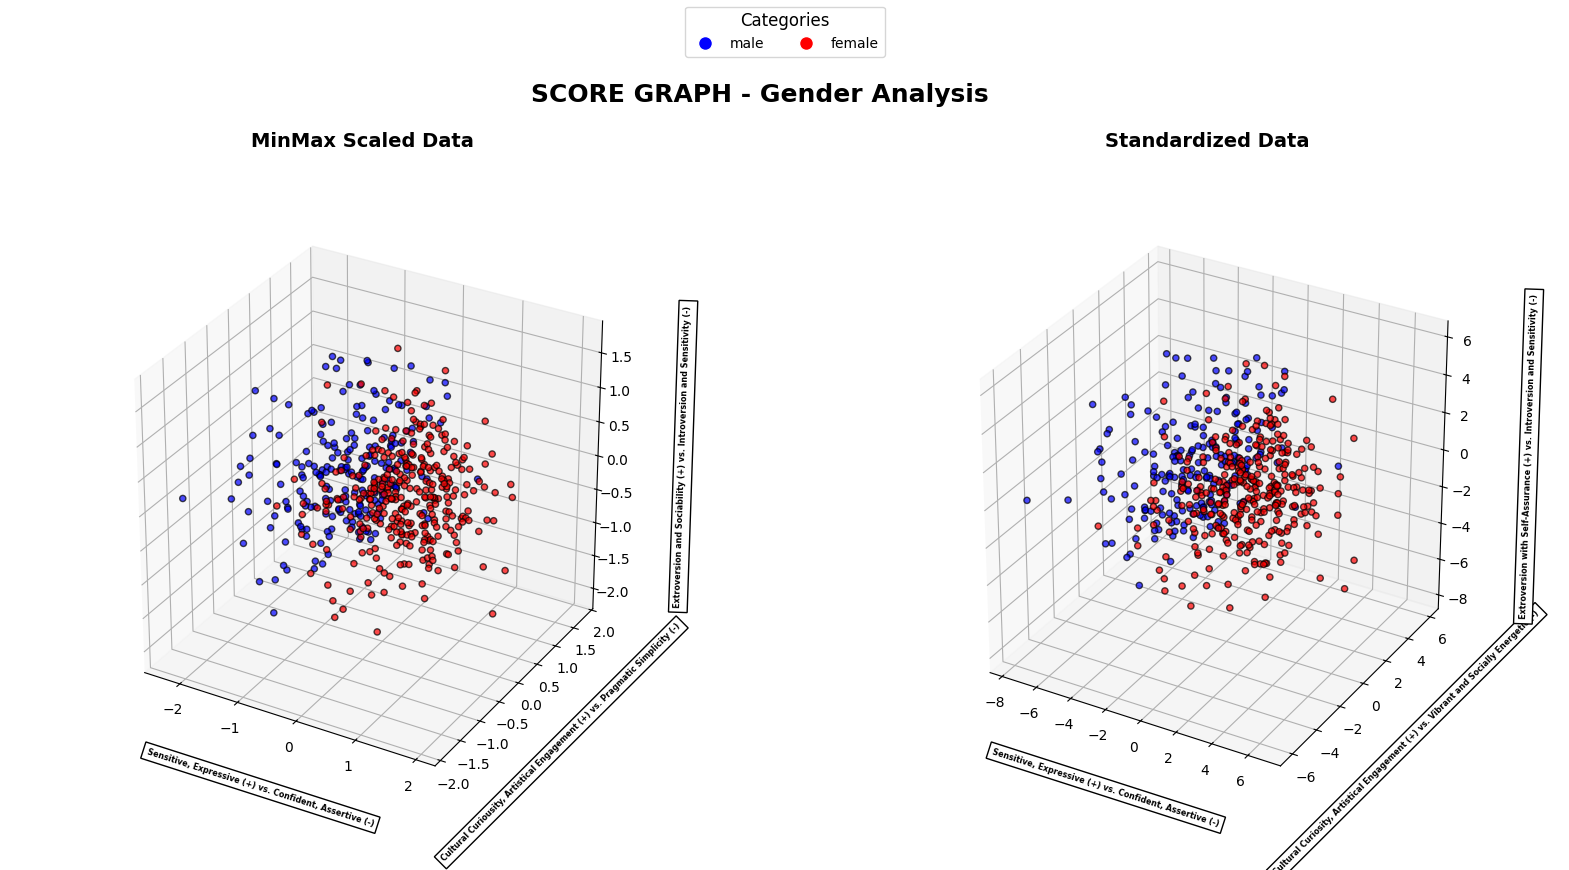

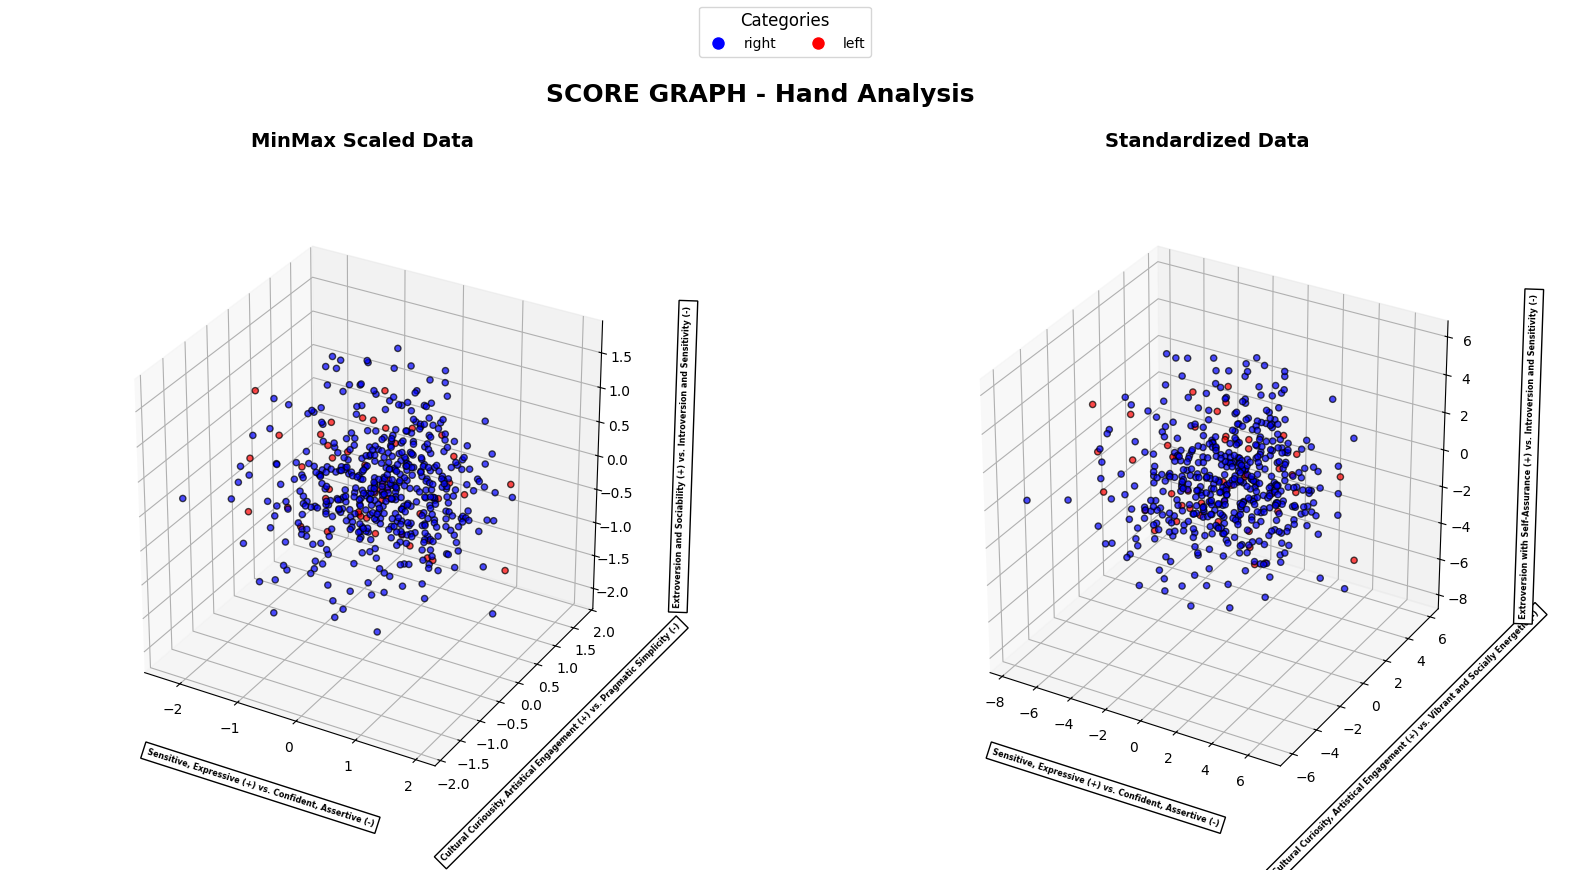

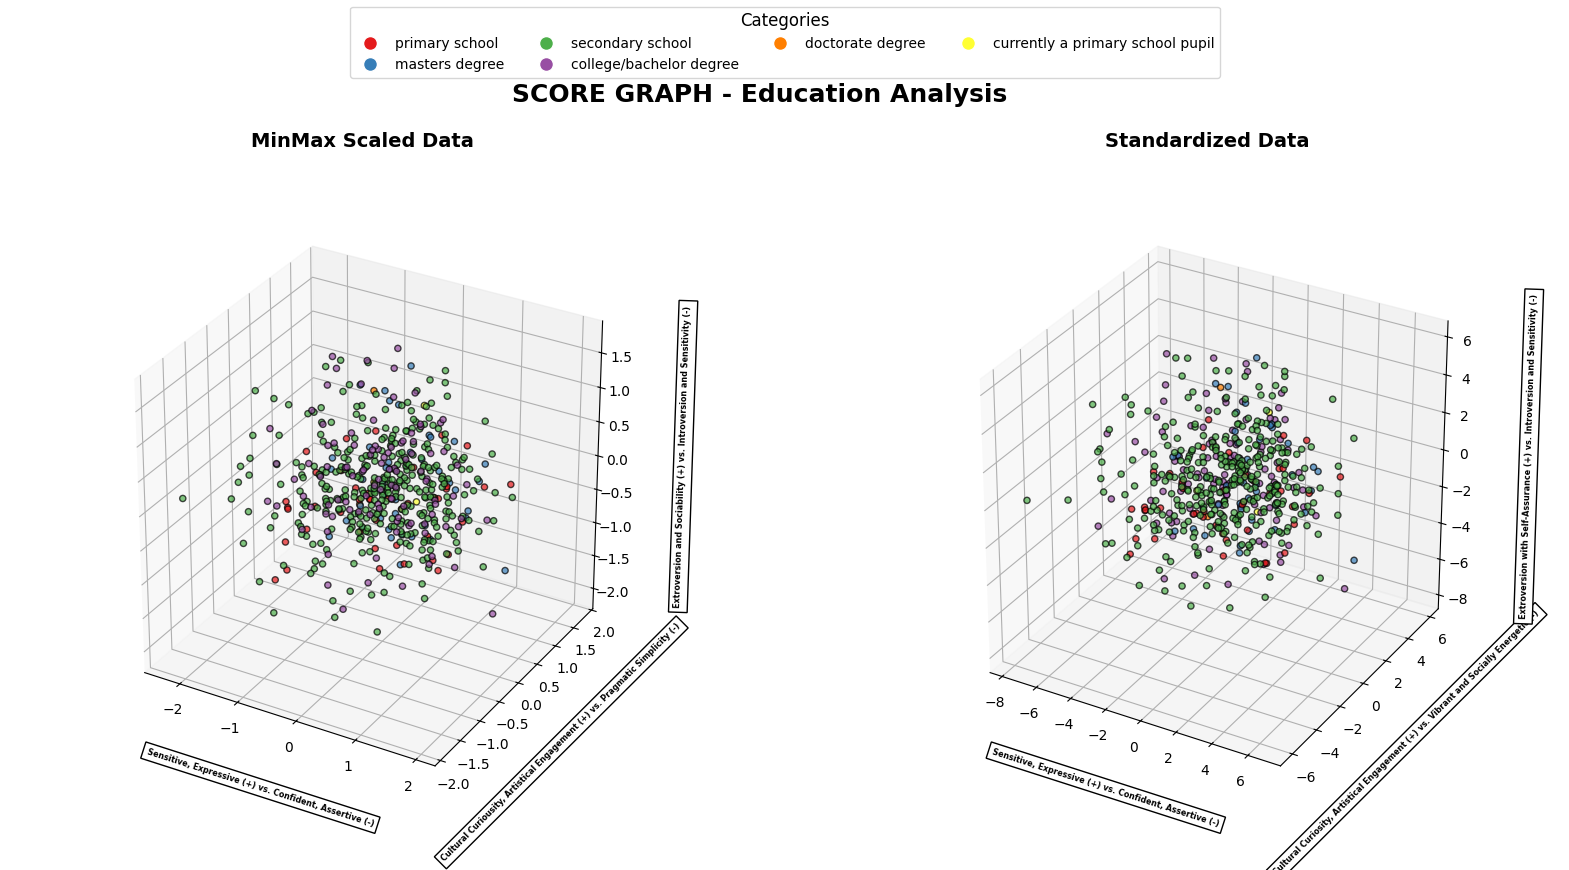

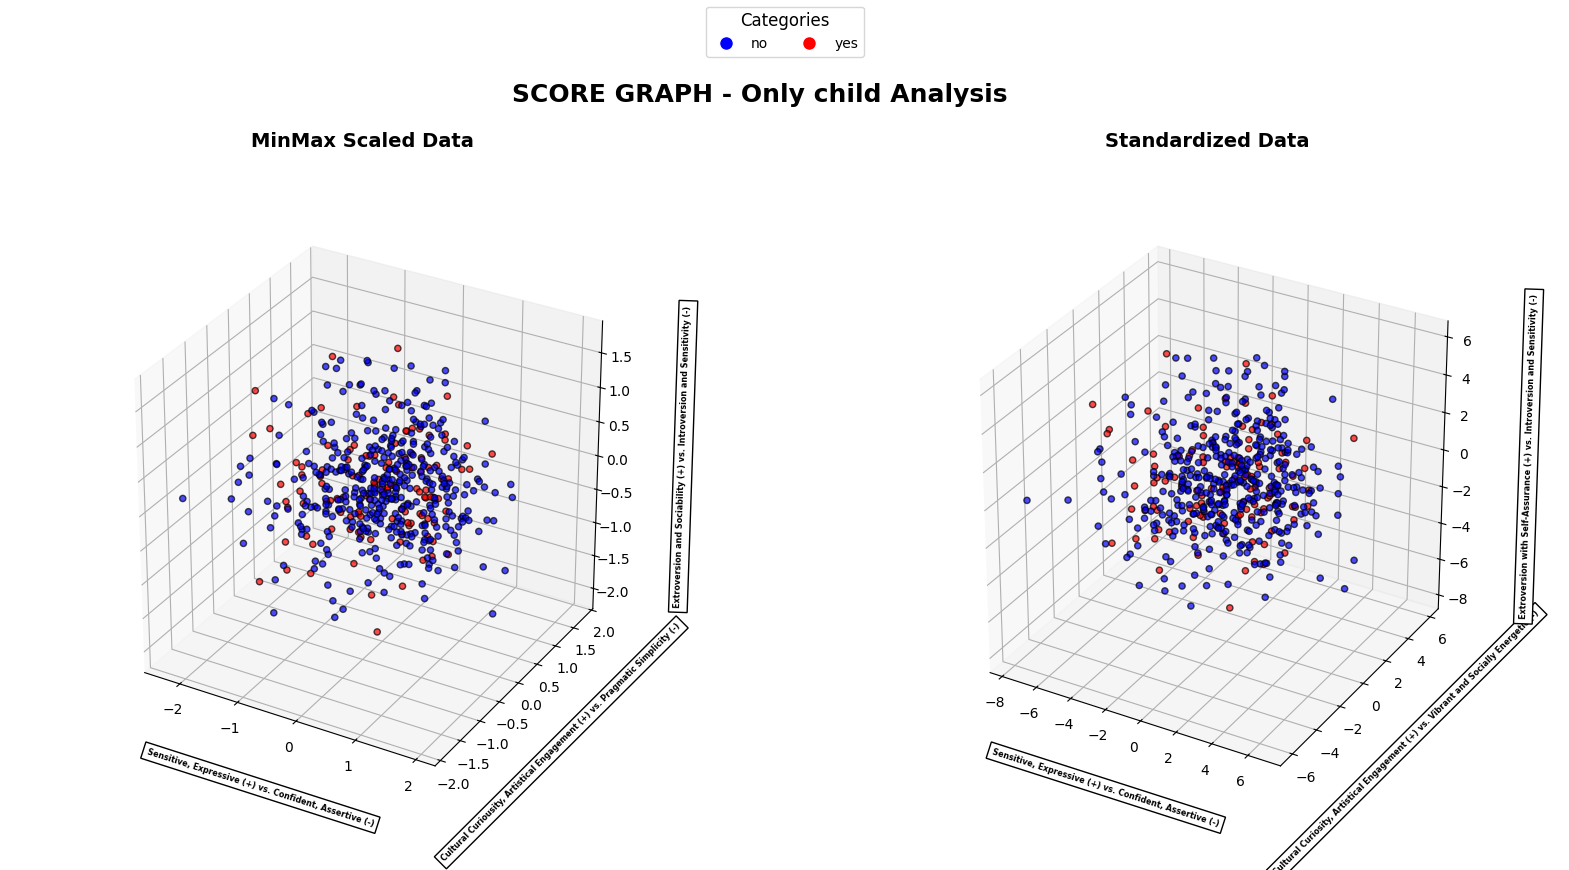

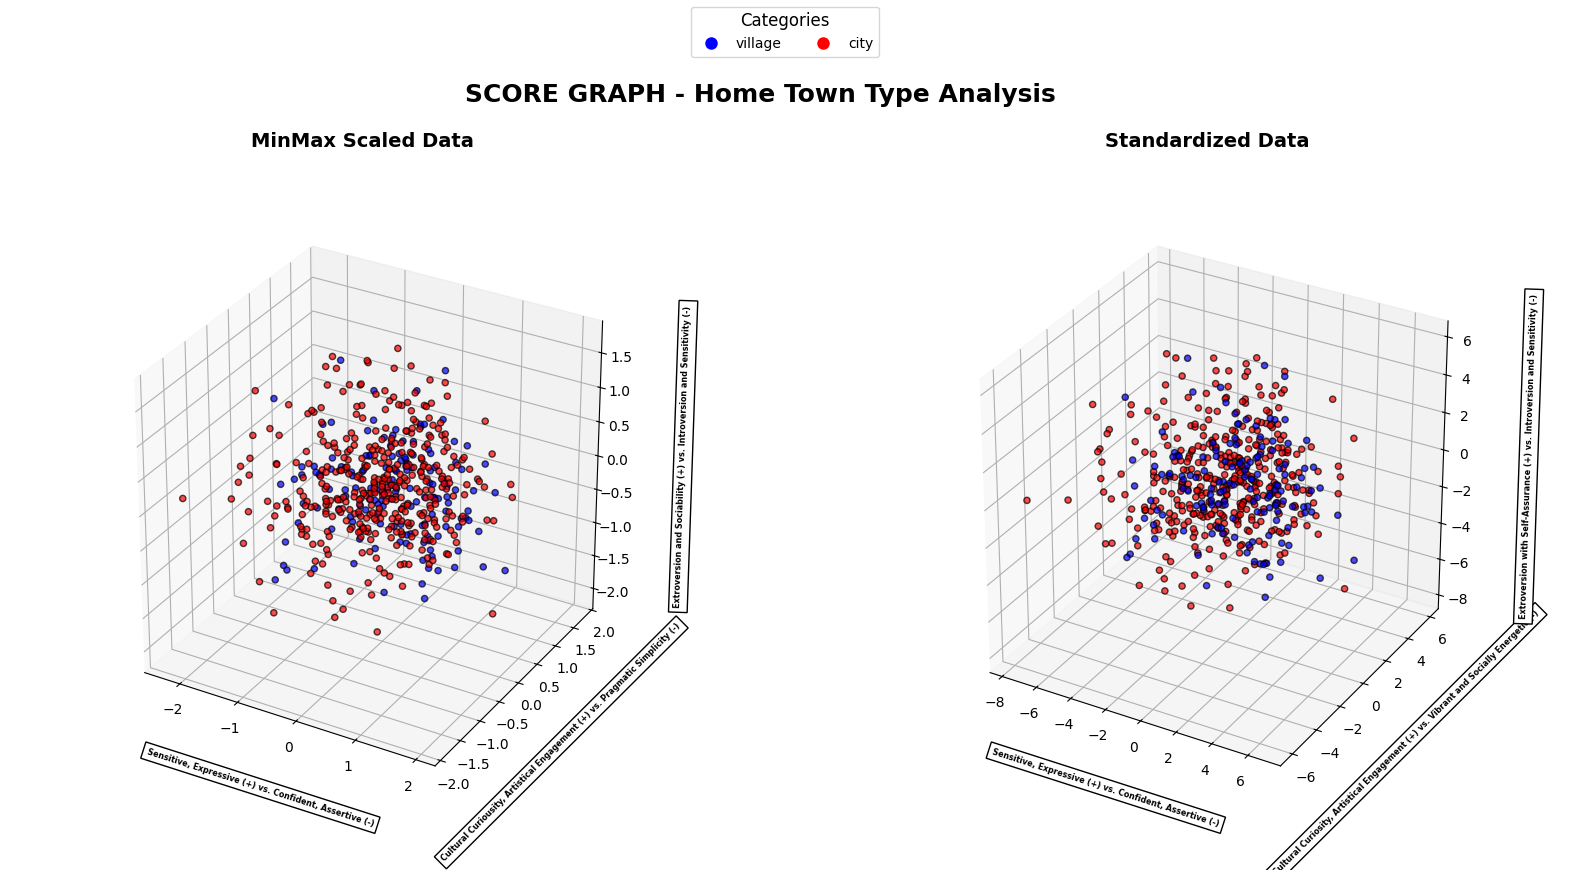

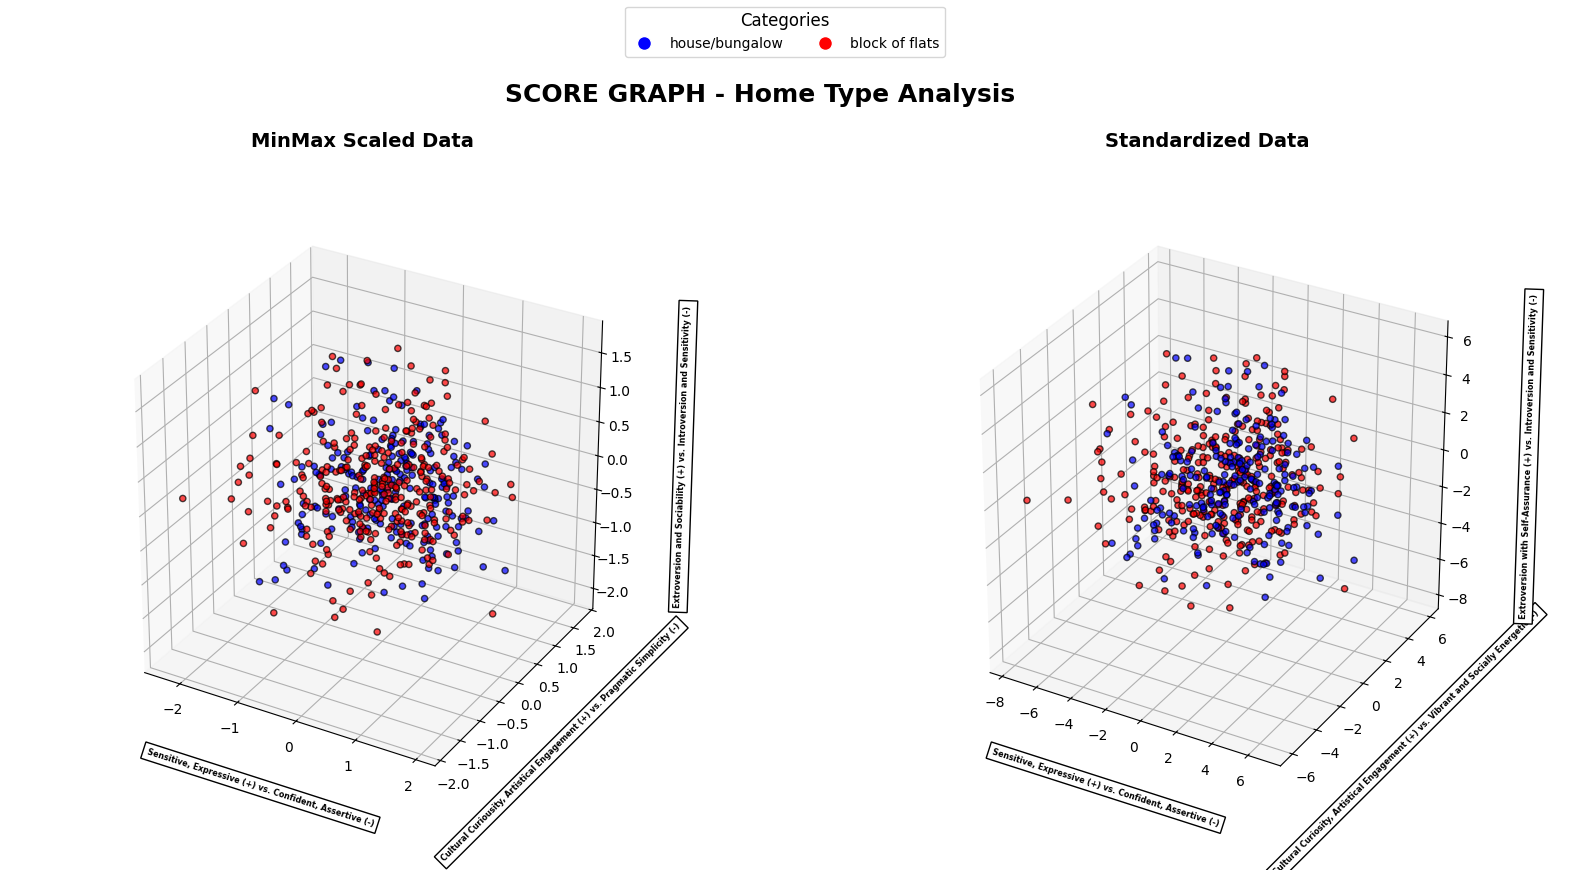

In [32]:
for col_name in y_df.columns:
    plot_labelled_score_graph(pc_names=pc_names, target=y_df[col_name], target_name=col_name)

**Gender Analysis Plot:**

The **SCORE GRAPH - Gender Analysis** provides a visual representation of the principal components, distinguishing individuals based on their gender (blue: male, red: female). The data suggests a potential trend:

- **Females** (red dots) are predominantly positioned in the **positive axis** of the first principal component (**PC1**), associated with being **sensitive and expressive**. This reflects traits such as emotional awareness, empathy, and relational sensitivity.
- **Males** (blue dots), on the other hand, are more frequently positioned in the **negative axis** of **PC1**, associated with being **confident and assertive**. This aligns with traits like resilience, independence, and boldness.

This is the only **almost clear separation** observed in the data across all analyzed components. While overlaps exist, suggesting shared characteristics between genders, PC1 shows a notable gender-based differentiation in the tendencies captured by this dimension.

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

In [33]:
# INITIALIZE SOME LISTS TO STORE THE TEMPORARY RESULTS AND, THEN, MAKE COMPARISONS
km_dict = {"MinMax Scaling": [],
           "Standard Scaling": []}

silcoeff_dict = {"MinMax Scaling": [], 
                 "Standard Scaling": []}

k_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
print("****************** START KMEANS RESEARCH ******************\n")
for transformation, reduced_data in REDUCED_DATA_DICTIONARY.items():
    print(f'---> START k-MEANS WITH k = {k_list[0]}, ..., {k_list[-1]}. ({transformation.capitalize()})')
    print('     Computing...')
    for i in range(len(k_list)):
        km_dict[transformation].append(KMeans(n_clusters=i+3, random_state=random_seed))
        km = km_dict[transformation][i]
        labels = km.fit_predict(X_mm_m)
        silcoeff_dict[transformation].append(silhouette_score(X=X_mm_m, labels=labels))
    print(f'---> END k-MEANS ({transformation.capitalize()})')
    print('')
print("******************* END KMEANS RESEARCH *******************\n\n")

print('****************** RESULTS OF THE SEARCH... ******************\n')
for transformation, results in silcoeff_dict.items():
    idx = np.argmax(results)
    k = k_list[idx]
    best_score = results[idx]
    print(f'BEST SILHOUETTE SCORE ({transformation}): {best_score} --> k = {k}')
print('\n**************************************************************')

****************** START KMEANS RESEARCH ******************

---> START k-MEANS WITH k = 3, ..., 10. (Minmax scaling)
     Computing...
---> END k-MEANS (Minmax scaling)

---> START k-MEANS WITH k = 3, ..., 10. (Standard scaling)
     Computing...


c:\Users\andre\Documents\University\1st Year\Algebra\HW_PCA\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\andre\Documents\University\1st Year\Algebra\HW_PCA\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, pre

---> END k-MEANS (Standard scaling)

******************* END KMEANS RESEARCH *******************


****************** RESULTS OF THE SEARCH... ******************

BEST SILHOUETTE SCORE (MinMax Scaling): 0.18294729227083958 --> k = 3
BEST SILHOUETTE SCORE (Standard Scaling): 0.18294729227083958 --> k = 3

**************************************************************


In [34]:
def plot_score_graph_with_centroids(REDUCED_DATA_DICTIONARY=REDUCED_DATA_DICTIONARY, pc_names=pc_names):

    X_mm_m, X_std_m = REDUCED_DATA_DICTIONARY["MinMax Scaling"], REDUCED_DATA_DICTIONARY["Standard Scaling"]

    labels_mm = km_dict["MinMax Scaling"][0].fit_predict(X_mm_m)
    labels_std = km_dict["Standard Scaling"][0].fit_predict(X_std_m)

    fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(20, 10))

    # Define colors for clusters
    cluster_colors = plt.cm.Set1(np.linspace(0, 1, 3))  # Tab10 colormap
    cluster_legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f"Cluster {i}")
        for i, color in enumerate(cluster_colors)
    ]
    centroid_legend_handle = plt.Line2D([0], [0], marker='*', color='r', markersize=15, label="Centroids")

    # Plot for MinMax Scaled Data
    ax1 = axes[0]
    for i in range(k):
        mask = (labels_mm == i)
        ax1.scatter(
            X_mm_m[mask, 0], X_mm_m[mask, 1], X_mm_m[mask, 2],
            color=cluster_colors[i], edgecolors="k", alpha=0.7, label=f"Cluster {i}"
        )
    # Plot Centroids for Minmax Scaled Data
    centroids = km_dict["MinMax Scaling"][0].cluster_centers_
    ax1.scatter(
        centroids[:, 0], centroids[:, 1], centroids[:, 2], 
        color='yellow', edgecolors="k", marker="*", s=500, alpha=0.9
    )
    ax1.set_title("MinMax Scaled Data", fontsize=14, fontweight="bold")
    ax1.set_xlabel(pc_names["MinMax Scaling"][0], labelpad=20, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax1.set_ylabel(pc_names["MinMax Scaling"][1], labelpad=20, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax1.set_zlabel(pc_names["MinMax Scaling"][2], labelpad=30, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.6'))
    ax1.set_box_aspect([1,1,1], zoom=0.8)
    

    # Plot for Standard Scaled Data
    ax2 = axes[1]
    for i in range(k):
        mask = (labels_std == i)
        ax2.scatter(
            X_std_m[mask, 0], X_std_m[mask, 1], X_std_m[mask, 2],
            color=cluster_colors[i], edgecolors="k", alpha=0.7, label=f"Cluster {i}"
        )
    # Plot Centroids for Standardized Data
    centroids = km_dict["Standard Scaling"][0].cluster_centers_
    ax2.scatter(
        centroids[:, 0], centroids[:, 1], centroids[:, 2], 
        color='yellow', edgecolors="k", marker="*", s=500, alpha=0.9
    )
    ax2.set_title("Standard Scaled Data", fontsize=14, fontweight="bold")
    ax2.set_xlabel(pc_names["Standard Scaling"][0], labelpad=20, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax2.set_ylabel(pc_names["Standard Scaling"][1], labelpad=20, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax2.set_zlabel(pc_names["Standard Scaling"][2], labelpad=30, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.6'))
    ax2.set_box_aspect([1,1,1], zoom=0.8)

    # Add legends to the plot
    fig.legend(handles=cluster_legend_handles + [centroid_legend_handle], 
               title="Legend", loc="upper center", ncol=k + 1, fontsize=10)

    # Adjust layout and title
    fig.suptitle(f"SCORE GRAPH", fontsize=18, fontweight='bold', y=0.92)
    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()
    plt.show()


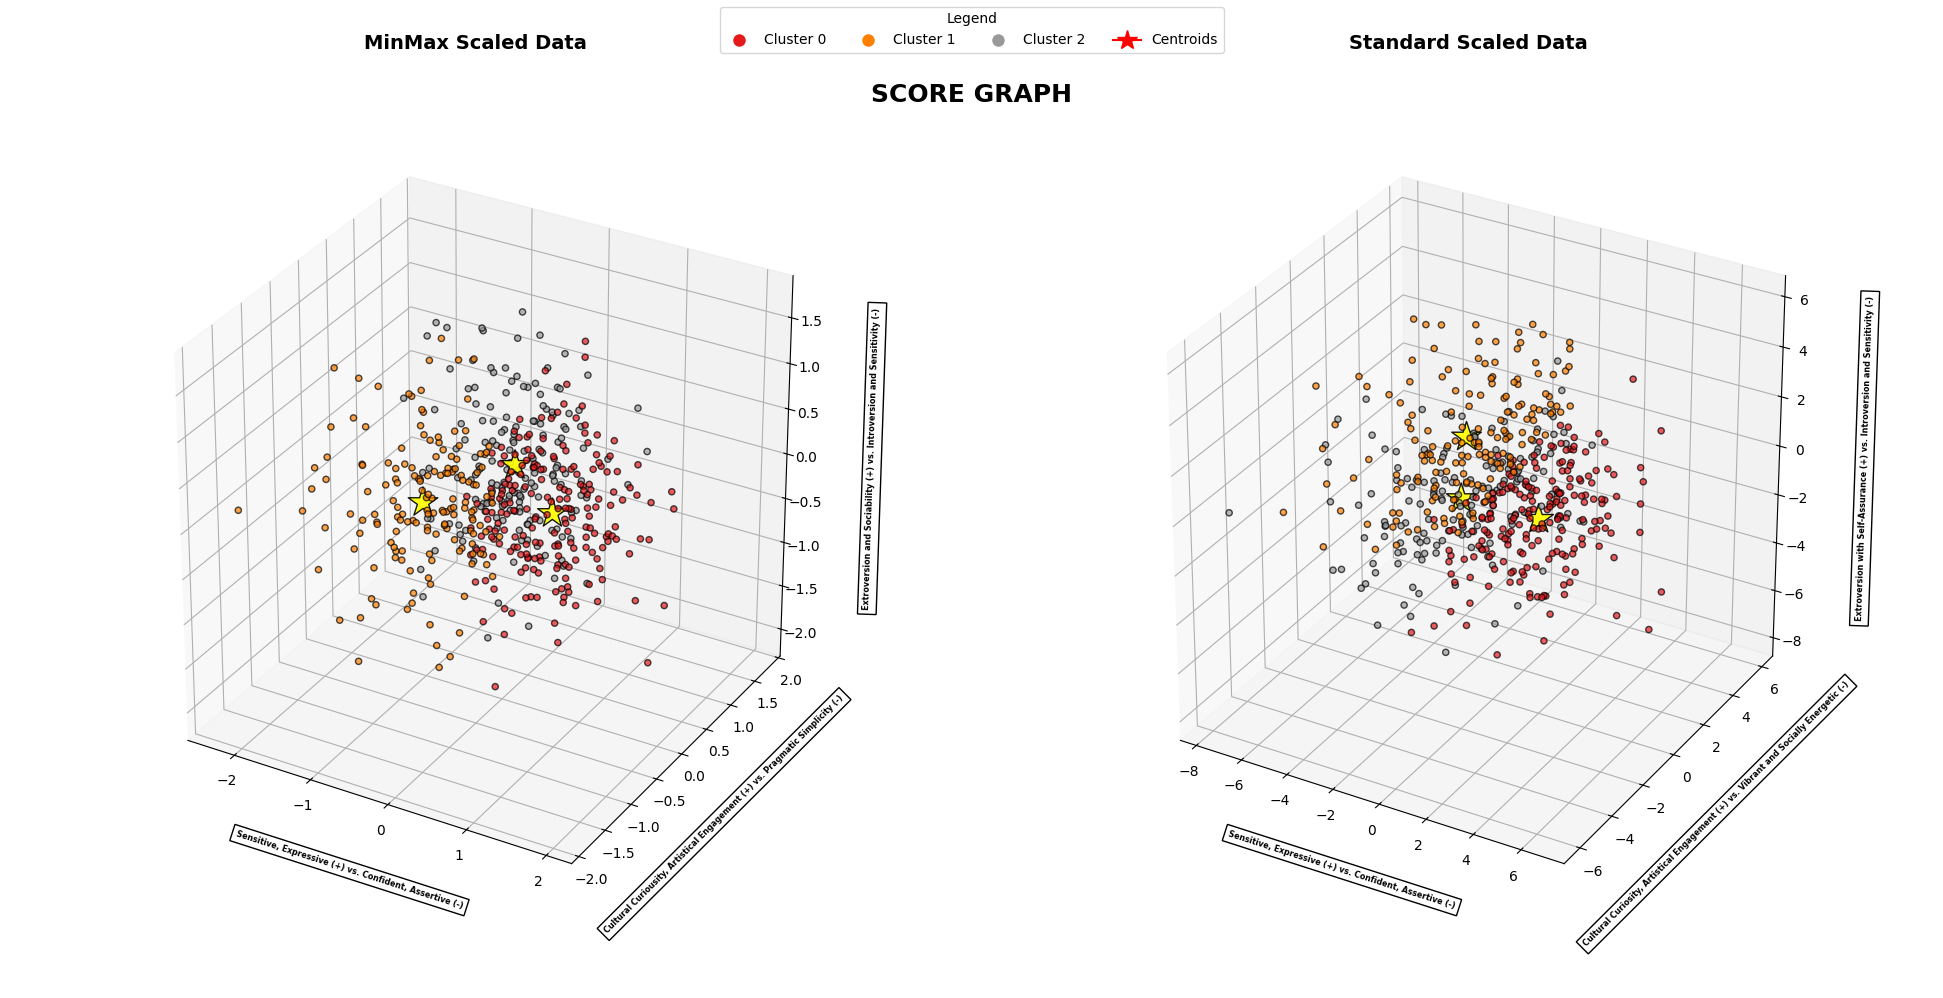

In [35]:
plot_score_graph_with_centroids()

In [36]:
def plot_centroids(X=None, pc_names=pc_names, centroids=None):

    # reduce dimensionality to three
    X = X[:, :3]
    centroids = centroids[:, :3]
    # take maximum and minimum of the data
    mins_x = X.min(axis=0)
    maxs_x = X.max(axis=0)

    fig, ax= plt.subplots(1, 3, figsize=(20, 10))
    for ii in range(3):
        
        ax[ii].bar(np.arange(centroids.shape[1]), maxs_x, color='blue', alpha=0.15)
        ax[ii].bar(np.arange(centroids.shape[1]), mins_x, color='blue', alpha=0.15)
        ax[ii].bar(np.arange(centroids.shape[1]), centroids[ii, :])
        ax[ii].set_xticks(ticks=np.arange(3))
        ax[ii].set_xticklabels(labels=pc_names, rotation=10, fontsize=10)
        ax[ii].grid(visible=True, which='both')
        ax[ii].set_title(f'CENTROID {ii+1}')
        

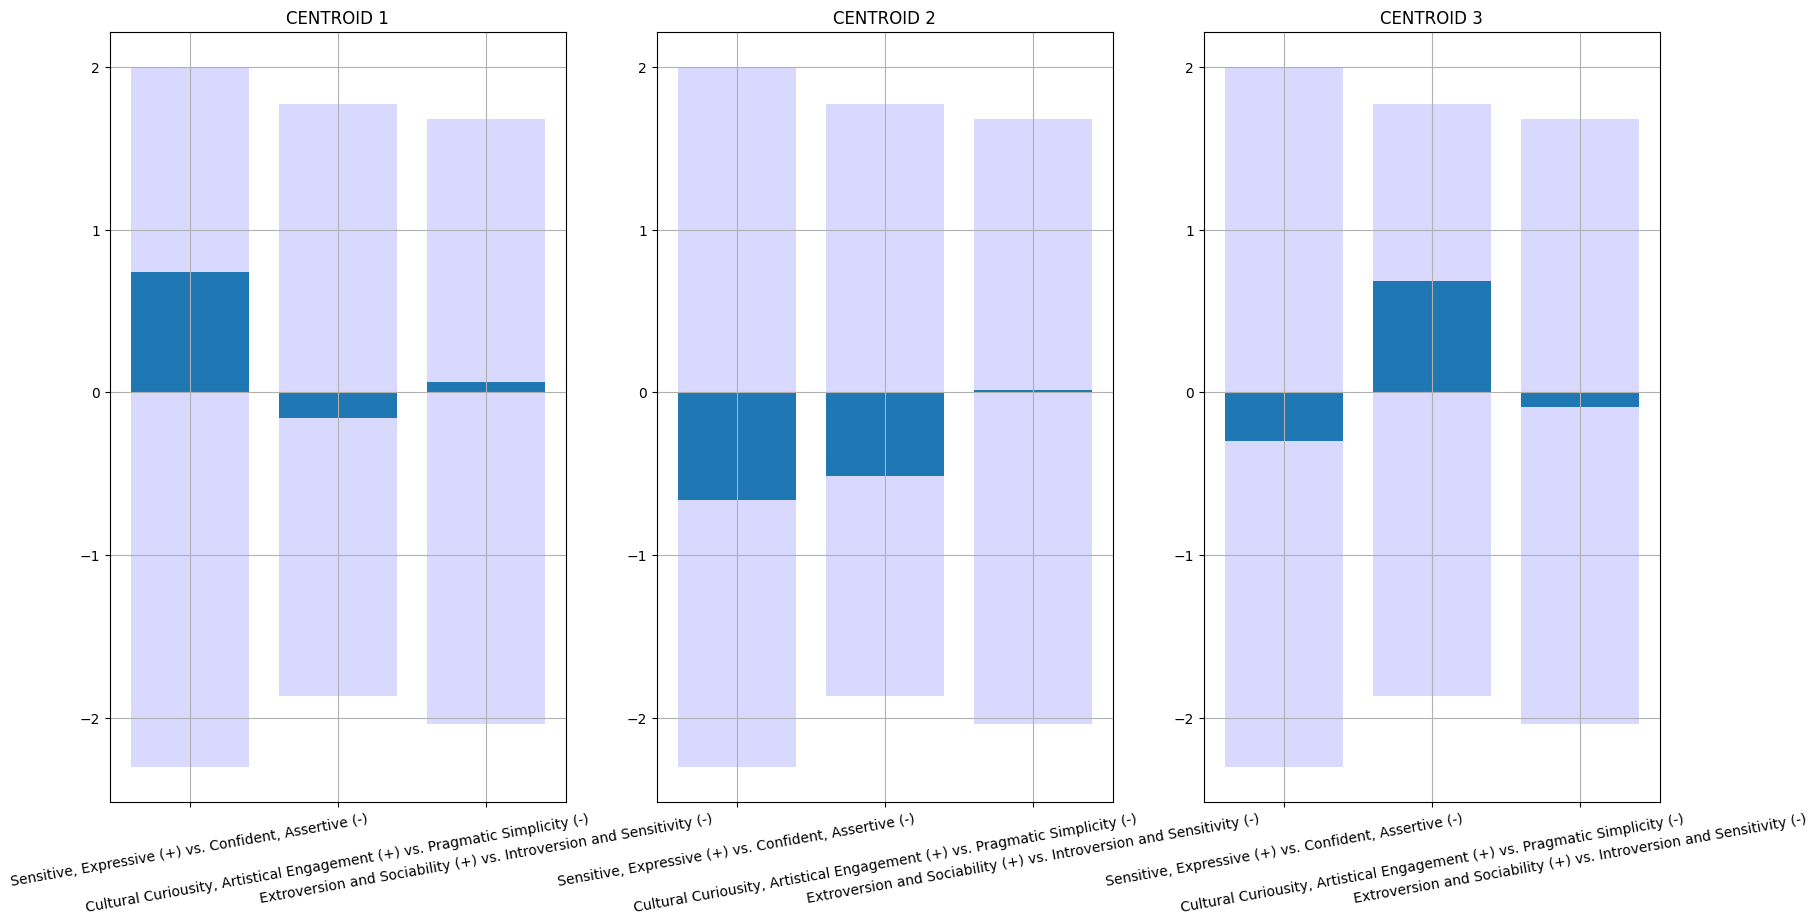

In [37]:
centroids_mm = km_dict["MinMax Scaling"][0].cluster_centers_
plot_centroids(X=X_mm_m, pc_names=pc_names["MinMax Scaling"], centroids=centroids_mm)

1. **Cluster 1: Sensitive Expressives**  
   (_Emotionally attuned individuals with moderate interest in cultural/artistic pursuits and social engagement_)

   This cluster represents individuals who score highly on sensitivity and emotional expressiveness (PC1). They tend to be empathetic, attuned to feelings—their own as well as those of others—and prioritize emotional connections. Their scores on cultural curiosity (PC2) and extroversion vs. introversion (PC3) are relatively modest, suggesting they do not strongly gravitate toward artistic pursuits or highly sociable activities. Nonetheless, their defining characteristic is **high emotional sensitivity and expressiveness** compared to more confident, assertive types.
   
2. **Cluster 2: Confident Pragmatists**  
   (_Bold and assertive personalities focused on practical approaches over artistic or cultural engagement_)

   This cluster captures individuals who score on the more assertive and self-assured side of PC1 (negative on Sensitive, Expressive vs. Confident, Assertive). They also lean toward pragmatic simplicity (negative on Cultural Curiosity, Artistic Engagement vs. Pragmatic Simplicity), meaning they tend to have less interest in cultural or artistic endeavors. Their personality style is practical, straightforward, and results-oriented, showing only moderate or low levels of emotional sensitivity or creative curiosity.
   
3. **Cluster 3: Culturally Engaged Moderates**  
   (_Individuals moderately confident and notably interested in cultural or artistic pursuits_)

   This cluster is characterized by a clear positive score on cultural curiosity and artistic engagement (PC2). While they are not extremely sensitive or strongly assertive on PC1, they maintain a balanced approach—somewhere between emotional expressiveness and confident assertiveness. Their interest in culture, art, and creative exploration stands out as their primary distinguishing feature, differentiating them from the more pragmatically focused or emotionally driven clusters.


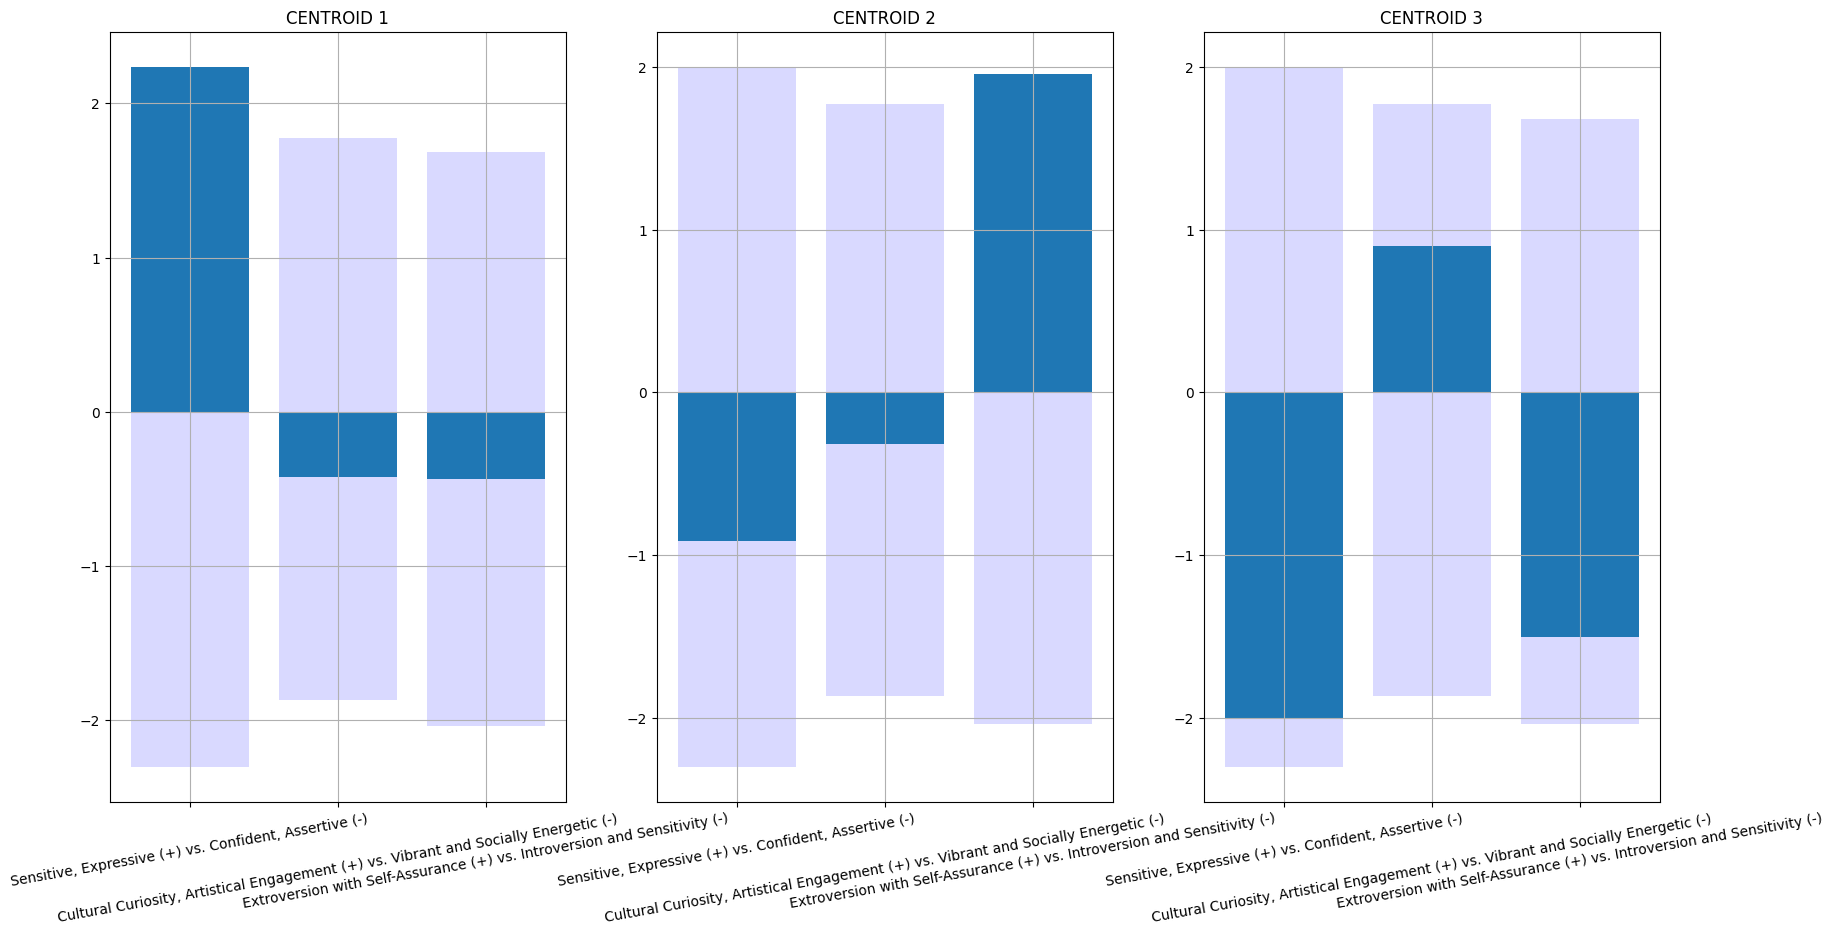

In [38]:
centroids_mm = km_dict["Standard Scaling"][0].cluster_centers_
plot_centroids(X=X_mm_m, pc_names=pc_names["Standard Scaling"], centroids=centroids_mm)

1. **Cluster 1: Sensitive and Socially Vibrant**  
   (_Expressive individuals with notable emotional sensitivity and a touch of outgoing energy_)

   This cluster is dominated by high scores on **Sensitivity and Expressiveness**, indicating a warm, empathetic style. At the same time, they exhibit **some degree of vibrant, socially energetic traits**, suggesting they enjoy interactive, lively settings on occasion. However, they also show elements of **introversion and sensitivity**, meaning their social energy is present but not overwhelming. Overall, these individuals strike a balance between reflective depth and a modest inclination toward social engagement.

2. **Cluster 2: Confident Extroverts**  
   (_Socially energetic individuals who balance self-assurance with an outgoing, assertive style_)

   This cluster is characterized by high scores on **Extroversion** and **Sociability**, indicating they thrive in social situations and often take an active role in group settings. Their **confidence and assertiveness** further suggest they are comfortable voicing opinions and taking the lead. Although they may still exhibit some introspection, their defining traits are overall boldness, gregarious energy, and a strong sense of self. 


3. **Cluster 3: Confident and Assertive with an Introverted Edge**  
   (_Self-assured individuals who balance boldness with a noticeable degree of introspection and sensitivity_)

   This cluster is defined by **strong confidence and assertiveness**, reflecting a bold, decisive outlook. Interestingly, they also exhibit **introversion and sensitivity**, suggesting they’re not purely extroverted go-getters—they may be selective about social engagements or thoughtful in their approach. There is **some vibrant, socially energetic component** here, but their most prominent traits remain assertiveness coupled with an undercurrent of introspective awareness.


## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

In [39]:
# Define the function to categorize Age
def categorize_age(age):
    if 15 <= age < 20:
        return 'Teens'
    elif 20 <= age < 25:
        return 'Young Adults'
    elif 25 <= age <= 30:
        return 'Adults'
    else:
        return 'Unknown'
    
# Define the function to categorize Height
def categorize_height(height):
    if 148 <= height < 165:
        return 'Short'
    elif 165 <= height < 185:
        return 'Average'
    elif 185 <= height <= 203:
        return 'Tall'
    else:
        return 'Unknown'


# Define the function to categorize Weight
def categorize_weight(weight):
    if 41 <= weight < 60:
        return 'Underweight'
    elif 60 <= weight < 85:
        return 'Normal Weight'
    elif 85 <= weight <= 125:
        return 'Overweight'
    else:
        return 'Unknown'

def categorize_siblings(num_siblings):
    if num_siblings == 0:
        return 'No siblings'
    elif 1 <= num_siblings <= 3:
        return 'Few siblings'
    elif num_siblings >= 4:
        return 'Many siblings'
    else:
        return 'Unknown'

In [40]:
y_df['Age Group'] = y_df['Age'].apply(categorize_age)
y_df['Height Category'] = y_df['Height'].apply(categorize_height)
y_df['Weight Category'] = y_df['Weight'].apply(categorize_weight)
y_df['Siblings Category'] = y_df['Number of siblings'].apply(categorize_siblings)

y_df = y_df.drop(columns=["Age", "Height", "Weight", "Number of siblings", "Only child"])
y_df

Gender   Hand         Education Home Town Type       Home Type  \
341    male  right    primary school        village  house/bungalow   
959  female   left    masters degree           city  block of flats   
379    male  right    masters degree           city  house/bungalow   
846  female  right  secondary school           city  block of flats   
689    male  right  secondary school           city  house/bungalow   
..      ...    ...               ...            ...             ...   
679  female   left  secondary school           city  block of flats   
732  female  right  secondary school        village  block of flats   
69   female   left  secondary school           city  block of flats   
179    male  right  secondary school           city  block of flats   
171    male  right  secondary school           city  block of flats   

        Age Group Height Category Weight Category Siblings Category  
341         Teens            Tall   Normal Weight      Few siblings  
959  Young Adults         Average     Underweight      Few siblings  
379        Adults         Average   Normal Weight      Few siblings  
846  Young Adults         Average     Underweight     Many siblings  
689         Teens         Average   Normal Weight      Few siblings  
..            ...             ...             ...               ...  
679  Young Adults            Tall   Normal Weight       No siblings  
732         Teens         Average   Normal Weight       No siblings  
69   Young Adults           Short     Underweight      Few siblings  
179  Young Adults         Average   Normal Weight      Few siblings  
171  Young Adults         Average   Normal Weight       No siblings  

[526 rows x 9 columns]

The dataset was cleaned and segmented to enhance interpretability and prepare it for analysis. The following changes were applied:

1. **Age**  
   Grouped into three categories to align with $K = 3$ for clustering:
   - `Teens` (15–19 years)  
   - `Young Adults` (20–24 years)  
   - `Adults` (25–30 years)  

2. **Height**  
   Simplified into three ranges:
   - `Short` (148–164 cm)  
   - `Average` (165–184 cm)  
   - `Tall` (185–203 cm)  

3. **Weight**  
   Consolidated into three groups:
   - `Underweight` (41–59 kg)  
   - `Normal Weight` (60–84 kg)  
   - `Overweight` (85–125 kg)  

4. **Number of Siblings**  
   Organized into three segments:
   - `Few siblings` (0–1)  
   - `Moderate siblings` (2–4)  
   - `Many siblings` (5 or more)  

5. **Only Child**  
   Removed due to redundancy, as it is already captured by the "No siblings" group.

**Benefits**  
These changes simplify the dataset, make it suitable for group-level analysis, and align it with clustering goals for $K = 3$. Continuous variables were converted into meaningful categories for easier interpretation and visualization.

In [41]:
from sklearn.metrics import adjusted_rand_score

labels = []
score = {"MinMax Scaling": [],
         "Standard Scaling": []}

km_mm = KMeans(n_clusters=3, random_state=random_seed)
mm_labels = km_mm.fit_predict(X=X_mm_m)

km_std = KMeans(n_clusters=3, random_state=random_seed)
std_labels = km_std.fit_predict(X=X_std_m)

print("************** EXPERIMENT ON LABELS **************")
for label in y_df.columns:
    print(f"---> Evaluating for {label}")
    labels.append(label)
    true_labels = y_df[label]
    score["MinMax Scaling"].append(adjusted_rand_score(true_labels, mm_labels))
    score["Standard Scaling"].append(adjusted_rand_score(true_labels, std_labels))
print("**************   END OF EXPERIMENT  **************")

id_mm = np.argmax(score["MinMax Scaling"])
id_std = np.argmax(score["Standard Scaling"])
best_score_mm = score["MinMax Scaling"][id_mm]
best_score_std = score["Standard Scaling"][id_std]
print(f"\n(MinMax Scaled Data) {labels[id_mm]} got best score: {best_score_mm}")
print(f"(Standardized Data) {labels[id_std]} got best score: {best_score_std}")

************** EXPERIMENT ON LABELS **************
---> Evaluating for Gender
---> Evaluating for Hand
---> Evaluating for Education
---> Evaluating for Home Town Type
---> Evaluating for Home Type
---> Evaluating for Age Group
---> Evaluating for Height Category
---> Evaluating for Weight Category
---> Evaluating for Siblings Category
**************   END OF EXPERIMENT  **************

(MinMax Scaled Data) Gender got best score: 0.23942226464620978
(Standardized Data) Gender got best score: 0.2510521323261409


From the previous plot, we see that Gender is the only  category showing any noticeable separation. The ARI scores confirm this, with Gender achieving the highest alignment (≈0.24–0.25) across both MinMax and Standard scaling. While these scores are still modest—meaning none of the  labels perfectly explains our 3-cluster solution—they do indicate that among all tested labels, Gender correlates most with how the clusters form. Nonetheless, the clusters appear largely driven by broader psychological or preference dimensions rather than any single factor presented from our labels.

In [42]:
# ===== 1. KMeans on MinMax-Scaled Data =====
kmeans_mm = KMeans(n_clusters=3, random_state=random_seed)
mm_labels = kmeans_mm.fit_predict(X_mm_m)

# Overall Silhouette Score
sil_mm_avg = silhouette_score(X_mm_m, mm_labels)
# Cluster-Level Silhouette Scores
sil_mm_samples = silhouette_samples(X_mm_m, mm_labels)

print(f"--- MinMax-Scaled Data ---")
print(f"Overall silhouette score = {sil_mm_avg:.3f}")

for cluster_id in np.unique(mm_labels):
    cluster_sil_values = sil_mm_samples[mm_labels == cluster_id]
    print(f"  Cluster {cluster_id}: mean silhouette = {cluster_sil_values.mean():.3f}")


# ===== 2. KMeans on Standard-Scaled Data =====
kmeans_std = KMeans(n_clusters=3, random_state=random_seed)
std_labels = kmeans_std.fit_predict(X_std_m)

# Overall Silhouette Score
sil_std_avg = silhouette_score(X_std_m, std_labels)
# Cluster-Level Silhouette Scores
sil_std_samples = silhouette_samples(X_std_m, std_labels)

print(f"\n--- Standard-Scaled Data ---")
print(f"Overall silhouette score = {sil_std_avg:.3f}")

for cluster_id in np.unique(std_labels):
    cluster_sil_values = sil_std_samples[std_labels == cluster_id]
    print(f"  Cluster {cluster_id}: mean silhouette = {cluster_sil_values.mean():.3f}")


--- MinMax-Scaled Data ---
Overall silhouette score = 0.183
  Cluster 0: mean silhouette = 0.215
  Cluster 1: mean silhouette = 0.160
  Cluster 2: mean silhouette = 0.164

--- Standard-Scaled Data ---
Overall silhouette score = 0.155
  Cluster 0: mean silhouette = 0.201
  Cluster 1: mean silhouette = 0.123
  Cluster 2: mean silhouette = 0.128


Both MinMax- and Standard-scaled clusters yield relatively low overall silhouette scores (0.183 and 0.155, respectively). Although Cluster 0 shows marginally better cohesion in each scaling approach, the mean silhouettes for Clusters 1 and 2 remain lower. These modest values suggest that the dataset does not exhibit strong natural separations, and the clusters appear somewhat randomly distributed rather than well-partitioned.

In [43]:
def plot_clustered_labelled_data(target, target_name):
    fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(20, 10))
    ax1, ax2 = axes[0], axes[-1]

    X_mm_m, X_std_m = REDUCED_DATA_DICTIONARY["MinMax Scaling"], REDUCED_DATA_DICTIONARY["Standard Scaling"]
    labels_mm, labels_std = km_dict["MinMax Scaling"][0].fit_predict(X_mm_m), km_dict["Standard Scaling"][0].fit_predict(X_std_m)
    clusters_mm, clusters_std = km_dict["MinMax Scaling"][0].cluster_centers_, km_dict["Standard Scaling"][0].cluster_centers_

    # Define colors for clusters
    cluster_colors = plt.cm.Set1(np.linspace(0, 1, 3))  # Tab10 colormap
    mm_colors = [cluster_colors[i] for i in labels_mm]
    
    cluster_color_mapping = {i: cluster_colors[i] for i in range(3)}

    # Define markers for categories
    markers = ["o", "s", "^", "D", "p", "*"]

    categories = list(target.unique())
    
    category_marker_mapping = {category: markers[i] for i, category in enumerate(categories)}
    for i in range(target.shape[0]):
        ax1.scatter(
            X_mm_m[i, 0], X_mm_m[i, 1], X_mm_m[i, 2], s=50,
            color=cluster_color_mapping[labels_mm[i]], edgecolors="k", alpha=0.7, marker=category_marker_mapping[target.iloc[i]]
        )

        ax2.scatter(
            X_std_m[i, 0], X_std_m[i, 1], X_std_m[i, 2], s=50,
            color=cluster_color_mapping[labels_std[i]], edgecolors="k", alpha=0.7, marker=category_marker_mapping[target.iloc[i]]
        )
    

    # Plot Centroids for MinMax Scaled Data
    ax1.scatter(
        clusters_mm[:, 0], clusters_mm[:, 1], clusters_mm[:, 2], 
        color='yellow', edgecolors="k", marker="*", s=500, alpha=0.9
    )   
    # Plot Centroids for Standardized Data
    ax2.scatter(
        clusters_std[:, 0], clusters_std[:, 1], clusters_std[:, 2], 
        color='yellow', edgecolors="k", marker="*", s=500, alpha=0.9
    )   

    ax1.set_title("MinMax Scaled Data", fontsize=14, fontweight="bold")
    ax1.set_xlabel(pc_names["MinMax Scaling"][0], labelpad=20, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax1.set_ylabel(pc_names["MinMax Scaling"][1], labelpad=20, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax1.set_zlabel(pc_names["MinMax Scaling"][2], labelpad=30, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.6'))
    ax1.set_box_aspect([1,1,1], zoom=0.8)

    ax2.set_title("Standard Scaled Data", fontsize=14, fontweight="bold")
    ax2.set_xlabel(pc_names["Standard Scaling"][0], labelpad=20, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax2.set_ylabel(pc_names["Standard Scaling"][1], labelpad=20, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))
    ax2.set_zlabel(pc_names["Standard Scaling"][2], labelpad=30, size="xx-small", weight="bold",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.6'))
    ax2.set_box_aspect([1,1,1], zoom=0.8)

    # Cluster legend handles
    cluster_legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f"Cluster {i}")
        for i, color in cluster_color_mapping.items()
    ]
    # Category legend handles
    category_legend_handles = [
        plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='k', markersize=10, label=category)
        for category, marker in category_marker_mapping.items()
    ]

    # Combine handles for a single legend
    combined_handles = cluster_legend_handles + category_legend_handles
    combined_labels = [h.get_label() for h in combined_handles]

    fig.legend(handles=combined_handles, labels=combined_labels, loc='upper center', 
               fancybox=True, shadow=True, ncol=2, fontsize=10, title="Clusters & Categories", title_fontsize=12)

    fig.suptitle(f"{target_name}", fontsize=18, fontweight='bold', y=0.80, color='crimson',
                 bbox=dict(facecolor='white',alpha=0.6,edgecolor='crimson',boxstyle='round,pad=0.4'))
    plt.tight_layout()
    plt.show()

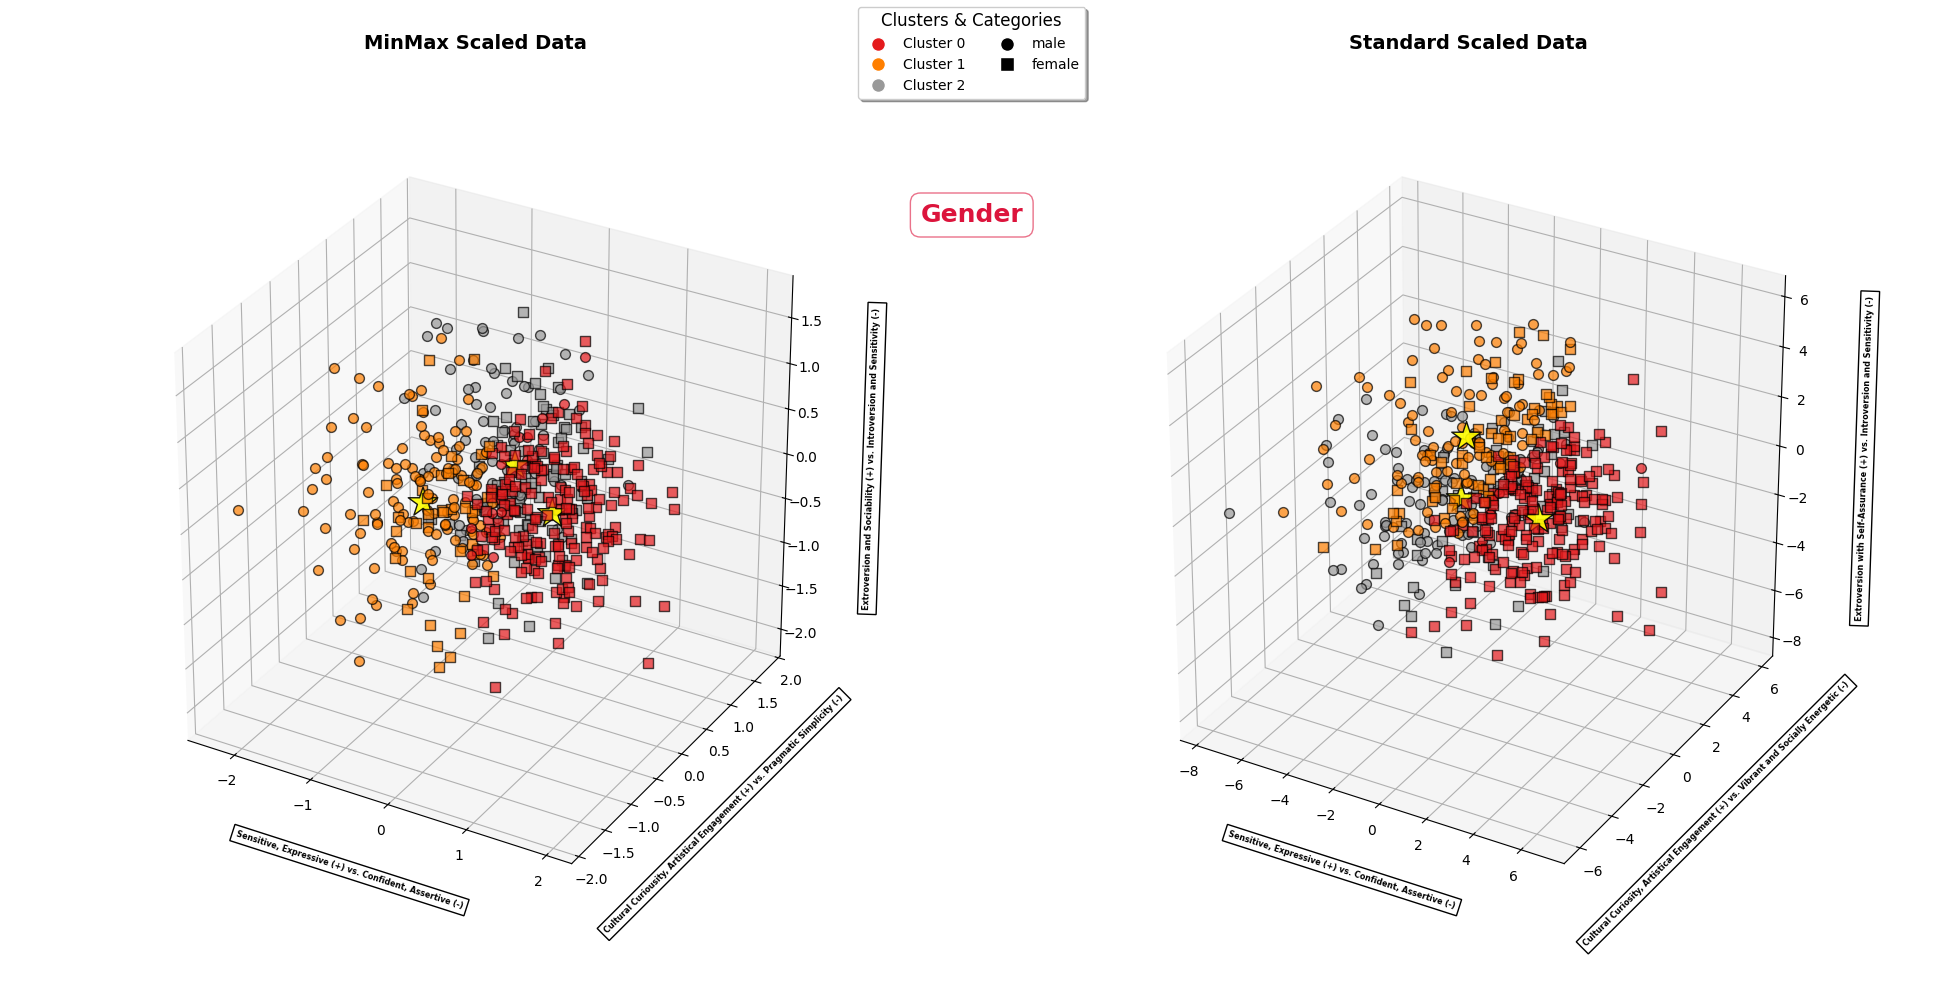

In [44]:
plot_clustered_labelled_data(target=y_df["Gender"], target_name="Gender")